In [1]:
import json
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import os
import random
import imageio
import cv2


from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import plot_model

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score,matthews_corrcoef

Using TensorFlow backend.


In [2]:
#Define the path to the directories containing training images and testing images 

json_file=open('input_param.json')
data = json.load(json_file) #load the json file data

train_stars_dir=data['cnn'][1] #load the path of directory containing stars training data

train_reflections_dir=data['cnn'][0] #load the path of directory containing reflections training data

test_dir=data['cnn'][2] #load the path where testing data is to be kept 

arti_test=data['cnn'][3] #load the path where artifact testing data is kept

star_test=data['cnn'][4] #load the path where star testing data is kept

challenge_data=data['challenge'][0] #load the path where challenging artfacts are kept

#Load all the training data and testing data into lists
train_stars=['./cutout/star_training/{}' .format(i) for i in os.listdir(train_stars_dir) if '.png' in i]
train_reflections=['./cutout/reflection_training/{}' .format(i) for i in os.listdir(train_reflections_dir) if '.png' in i]

test_images=['./cutout/test/{}'.format(i) for i in os.listdir(test_dir) if '.png' in i]

arti_test_image=['./cutout/test/artifacts/{}'.format(i) for i in os.listdir(arti_test) if '.png' in i]

star_test_image=['./cutout/test/stars/{}'.format(i) for i in os.listdir(star_test) if '.png' in i]

challenge_image=['./cutout/challenge/{}'.format(i) for i in os.listdir(challenge_data) if '.png' in i]


train_images=train_stars+train_reflections+challenge_image #combine training data of stars and reflections
random.shuffle(train_images) #shuffle the training data randomly
print(len(train_images)) #Check the total number of training images First we define the paths to the different directories containing the training and testing images. We load all the training and testing images as lists so that it is easier to access them.

1761


Shape of Tensor 'images' (1761, 64, 64)
Shape of Tensor 'labels ' (1761,)
Total Images with artifacts 925
Total Images with stars  836


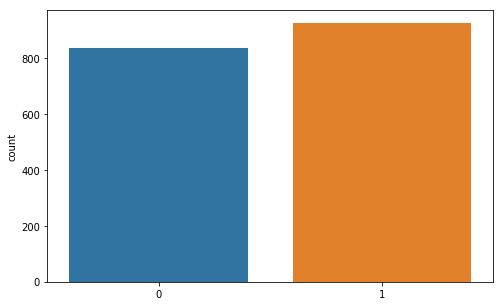

In [3]:
nx,ny,channels=64,64,1 #shape of input data. It is 64x64 pixels and 1 channel


images=[] #empty list which will be populated with images
labels=[] #empty list which will have labels.

images_name=[] #empty list containing names of all images

#Labels are either 1 or 0. 1 for artifacts, 0 for stars

def read_images(list_images): #function to generate lists of data and labels
    for img in list_images:
        
                    
        if 'cut_arti' in img: #if filename contains this string then append 1 to the labels list else 0
            images.append(cv2.resize(cv2.imread(img,0), (nx,ny), interpolation=cv2.INTER_CUBIC))
            #i=(np.rot90(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), (nx,ny), interpolation=cv2.INTER_CUBIC)))
            #i=np.rot90(i)
            #name=str(img[:-4])+'_rot180.png'
            #cv2.imwrite(name,i)
            #images.append(i)
            labels.append(1)
            images_name.append(img)
            #labels.append(1)

        elif 'cut_star' in img:
            
            images.append(cv2.resize(cv2.imread(img,0), (nx,ny), interpolation=cv2.INTER_CUBIC))
            #j=(np.rot90(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), (nx,ny), interpolation=cv2.INTER_CUBIC)))
            #j=np.rot90(j)
            #name=str(img[:-4])+'_rot180.png'
            #cv2.imwrite(name,j)
            #images.append(j)
            #labels.append(0)
            
            images_name.append(img)

            labels.append(0)
                        
    return images,labels

new_val_images=train_stars+challenge_image+train_reflections #combine training data of stars and reflections
#random.shuffle(new_val_images) #shuffle the training data randomly

new_images,new_labels=read_images(new_val_images)


new_images=np.array(new_images) # convert lists to numpy arrays. 

new_labels=np.array(new_labels) # convert lists to numpy arrays. 

l = len(new_images)


#Thus we now have a tensor images and labels. 

print("Shape of Tensor 'images'",new_images.shape) #print(images.shape,labels.shape) #shape of images and labels

print("Shape of Tensor 'labels '",new_labels.shape)
import seaborn as sns



plt.figure(figsize=(8, 5))
sns_plot=sns.countplot(new_labels) #view distribution of training data. Labels with 0 are stars, labels with 1 are artifacts

#sns_plot.figure.savefig('sns.png',dpi=200)


print("Total Images with artifacts",len(new_labels[new_labels==1]))
print("Total Images with stars ",len(new_labels[new_labels==0]))

new_images=new_images.reshape(l,64,64,1)

In [4]:
new_images.shape

(1761, 64, 64, 1)

In [5]:
543+382

925

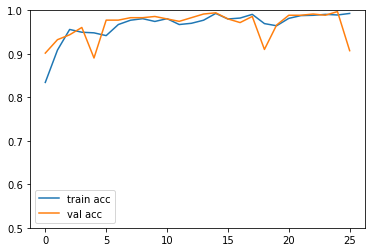

In [9]:
import matplotlib.pyplot as plt
acc_val=[0.901685393258427, 0.9325842696629213, 0.9438202247191011, 0.9606741573033708, 0.8904494382022472, 0.9775280898876404, 0.9775280898876404, 0.9831460674157303, 0.9831460674157303, 0.9859550561797753, 0.9803370786516854, 0.9747191011235955, 0.9831460674157303, 0.9915730337078652, 0.9943820224719101, 0.9803370786516854, 0.9719101123595506, 0.9859550561797753, 0.9101123595505618, 0.9662921348314607, 0.9887640449438202, 0.9887640449438202, 0.9915730337078652, 0.9887640449438202, 0.9971910112359551, 0.9073033707865169]
acc_train=[0.8342776203966006, 0.9086402266288952, 0.9560906515580736, 0.9497167138810199, 0.9483002832861189, 0.9419263456090652, 0.9674220963172805, 0.9773371104815864, 0.9808781869688386, 0.9745042492917847, 0.9808781869688386, 0.9674220963172805, 0.9702549575070821, 0.9773371104815864, 0.9929178470254958, 0.9801699716713881, 0.9822946175637394, 0.9907932011331445, 0.9695467422096318, 0.9645892351274787, 0.9815864022662889, 0.9879603399433428, 0.9886685552407932, 0.9907932011331445, 0.9893767705382436, 0.9929178470254958]
plt.ylim([0.5,1])
plt.plot(acc_train,label='train acc')
plt.plot(acc_val,label='val acc')
plt.legend()
plt.show()

In [6]:
random_state=2
#split data into training and validation data
from sklearn.model_selection import train_test_split
images_train, images_val, labels_train,labels_val=train_test_split(new_images,new_labels,test_size=0.2,random_state=random_state)  


name_train, name_val, _, _ = train_test_split(images_name,new_labels,test_size=0.2,random_state=random_state)
#random state = 2 is the seed number for generating a random number. 

ntrain=len(images_train) #length of training data
nval=len(images_val) #length of validation data


batch_size=4 # Set Batch size as 4.

print("Length of Training Data",ntrain)
print("Length of Validation Data",nval)
print("Batch Size ", batch_size)

Length of Training Data 1408
Length of Validation Data 353
Batch Size  4


In [7]:
ntrain//batch_size

352

In [8]:
model2 = models.Sequential() #Creates a sequential model 
model2.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64,1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.4))  #Dropout for regularization
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

model2.summary()
model2.compile(loss='binary_crossentropy', optimizer=optimizers.adam(lr=1e-3), metrics=['acc'])

plot_model(model2, to_file='model2_mixed_artifacts_3conv.png')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [ ]:
2453569 - 2452993

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True, vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

train_generator = train_datagen.flow(images_train, labels_train, batch_size=batch_size) 
val_generator = val_datagen.flow(images_val, labels_val, batch_size=batch_size)


In [10]:
from IPython.display import clear_output
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [ ]:

#history = model2.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=100,
                              callbacks=[plot],
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

In [ ]:
#import pickle
#with open('models/adam/trainHistoryDict_model2.txt', 'wb') as file_pi:
#    pickle.dump(history.history, file_pi)


#with open('models/adam/trainHistoryDict_model2..json', 'w') as f:
#    json.dump(history.history, f)


In [ ]:
#model2.save_weights('models/adam/weights_model2.h5') #save the weights of the model
#model2.save('models/adam/model2.h5') #save the model

In [10]:
from keras.models import load_model
model2=load_model('models/adam/model2.h5') #load model
model2.load_weights('models/adam/weights_model2.h5') #load model weights

Instructions for updating:
Use tf.cast instead.


In [12]:
train_history=open('models/adam/trainHistoryDict_model2..json','r')
file=train_history.readlines()
for line in file:
    line=line.split()
    
acc = history.history['acc'] #accuracy history
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')

plt.legend()
#plt.savefig('training_validation_plots_model9.png',dpi=300,format='png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.legend()
#plt.savefig('training_validation_loss_model9.png',dpi=300,format='png')

plt.show()


NameError: name 'history' is not defined

In [11]:
l=0
yhat=[] #empty list to which we append predicted label
probl=[] #empty list to which we append probability of prediction

# Loop through the images in validation data with batch size 1 and predict on each

for batch in val_datagen.flow(images_val,batch_size=1,shuffle=False):
    
    pr=model2.predict(batch)
    probl.append(pr)
    #If prediction is greater than 0.5 then mark as artifact else star
    if pr<0.5:
        yhat.append(0) #label 1 for artifact
    else:
        yhat.append(1) #label 0 for star
        
    l+=1
    if(l==len(images_val)):
        break
    

[[170   3]
 [  5 175]]
F1 Score is :  0.9776536312849161
Matthews Correlation Coefficient 0.9547278979989932
Recall is :  0.9722222222222222
Precision score is :  0.9831460674157303
Area under curve is  0.9962427745664739
[2.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 9.312e-01
 9.297e-01 6.470e-01 6.333e-01 6.187e-01 6.079e-01 5.122e-01 3.159e-01
 2.015e-01 1.895e-01 1.852e-01 1.484e-01 7.617e-02 5.585e-02 4.581e-02
 2.440e-04 2.334e-04 0.000e+00]
[0.      0.      0.      0.      0.      0.      0.      0.00578 0.00578
 0.01156 0.01156 0.01733 0.01733 0.02312 0.02312 0.0289  0.0289  0.03467
 0.03467 0.05203 0.05203 0.3064  0.3064  1.     ]
[0.     0.1055 0.1111 0.1278 0.15   0.1722 0.778  0.778  0.9556 0.9556
 0.961  0.961  0.972  0.972  0.9775 0.9775 0.9834 0.9834 0.989  0.989
 0.9946 0.9946 1.     1.    ]


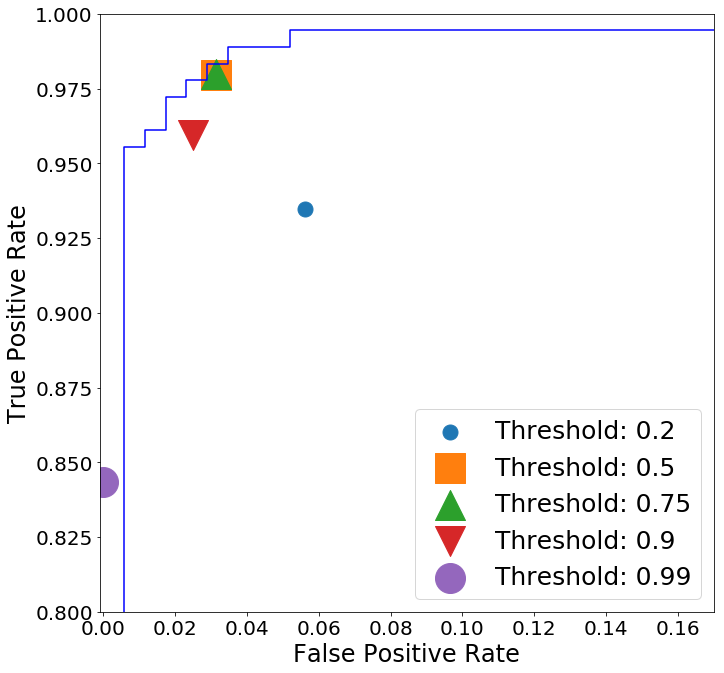

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score,auc
import scikitplot as skplt


conf=confusion_matrix(labels_val,yhat) 
print(conf) #Print confusion Matrix
print("F1 Score is : ",f1_score(labels_val,yhat))
print("Matthews Correlation Coefficient",matthews_corrcoef(labels_val,yhat))
print("Recall is : ",recall_score(labels_val,yhat))
print("Precision score is : ",precision_score(labels_val,yhat))

probl=np.array(probl) #make numpy array of list probl
yhat=np.array(yhat) #make numpy array of list yhat
probl=probl.flatten() #prepare the numpy array so that it is in valid format for roc_auc_score function

roc_sc=roc_auc_score(labels_val,probl) #Finding Area under curve of ROC
print("Area under curve is ",roc_sc)

plt.rcParams["figure.figsize"] = [11,11]
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 25
fpr, tpr, thresholds = roc_curve(labels_val,probl)
plt.plot(fpr,tpr,'b')
plt.plot(fpr,fpr,'r')
s=900
plt.scatter(0.05624,0.9346,label='Threshold: 0.2',marker='.',s=s)
plt.scatter(0.03125,0.9797,label='Threshold: 0.5',marker=',',s=s)
plt.scatter(0.03125,0.98,label='Threshold: 0.75',marker='^',s=s)
plt.scatter(0.025,0.9595,label='Threshold: 0.9',marker='v',s=s)
plt.scatter(0,0.8433,label='Threshold: 0.99',marker='o',s=s)
plt.ylim(0.8,1)
plt.xlim(-0.001,0.17)

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend(['AUC=0.996','AUC=0.500'])
#plt.savefig('ROC_cuve_zoom_jpg.png',dpi=150)

print(np.array(thresholds,dtype='float16'))
print(np.array(fpr,dtype='float16'))
print(np.array(tpr,dtype='float16'))

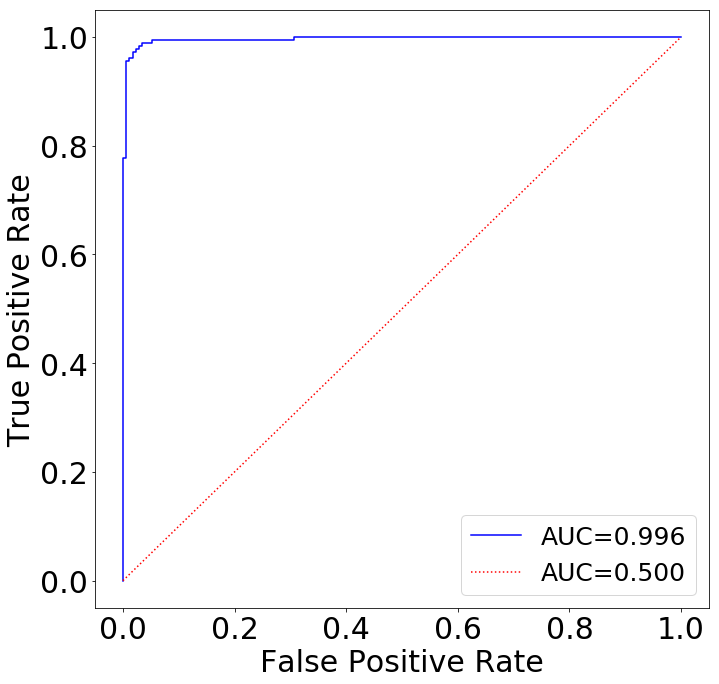

In [13]:
plt.rcParams["axes.labelsize"]=30
plt.rcParams["xtick.labelsize"]=30
plt.rcParams["ytick.labelsize"]=30
roc_auc = auc(fpr, tpr) # compute area under the curve
plt.plot(fpr, tpr,'b-',label='AUC=0.996',)
plt.plot([0, 1], [0, 1], 'r:',label='AUC=0.500')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()
#plt.savefig('rocnew.jpg',dpi=100)

plt.close()

Confusion matrix, without normalization
[[170   3]
 [  5 175]]
Normalized confusion matrix
[[0.98 0.02]
 [0.03 0.97]]


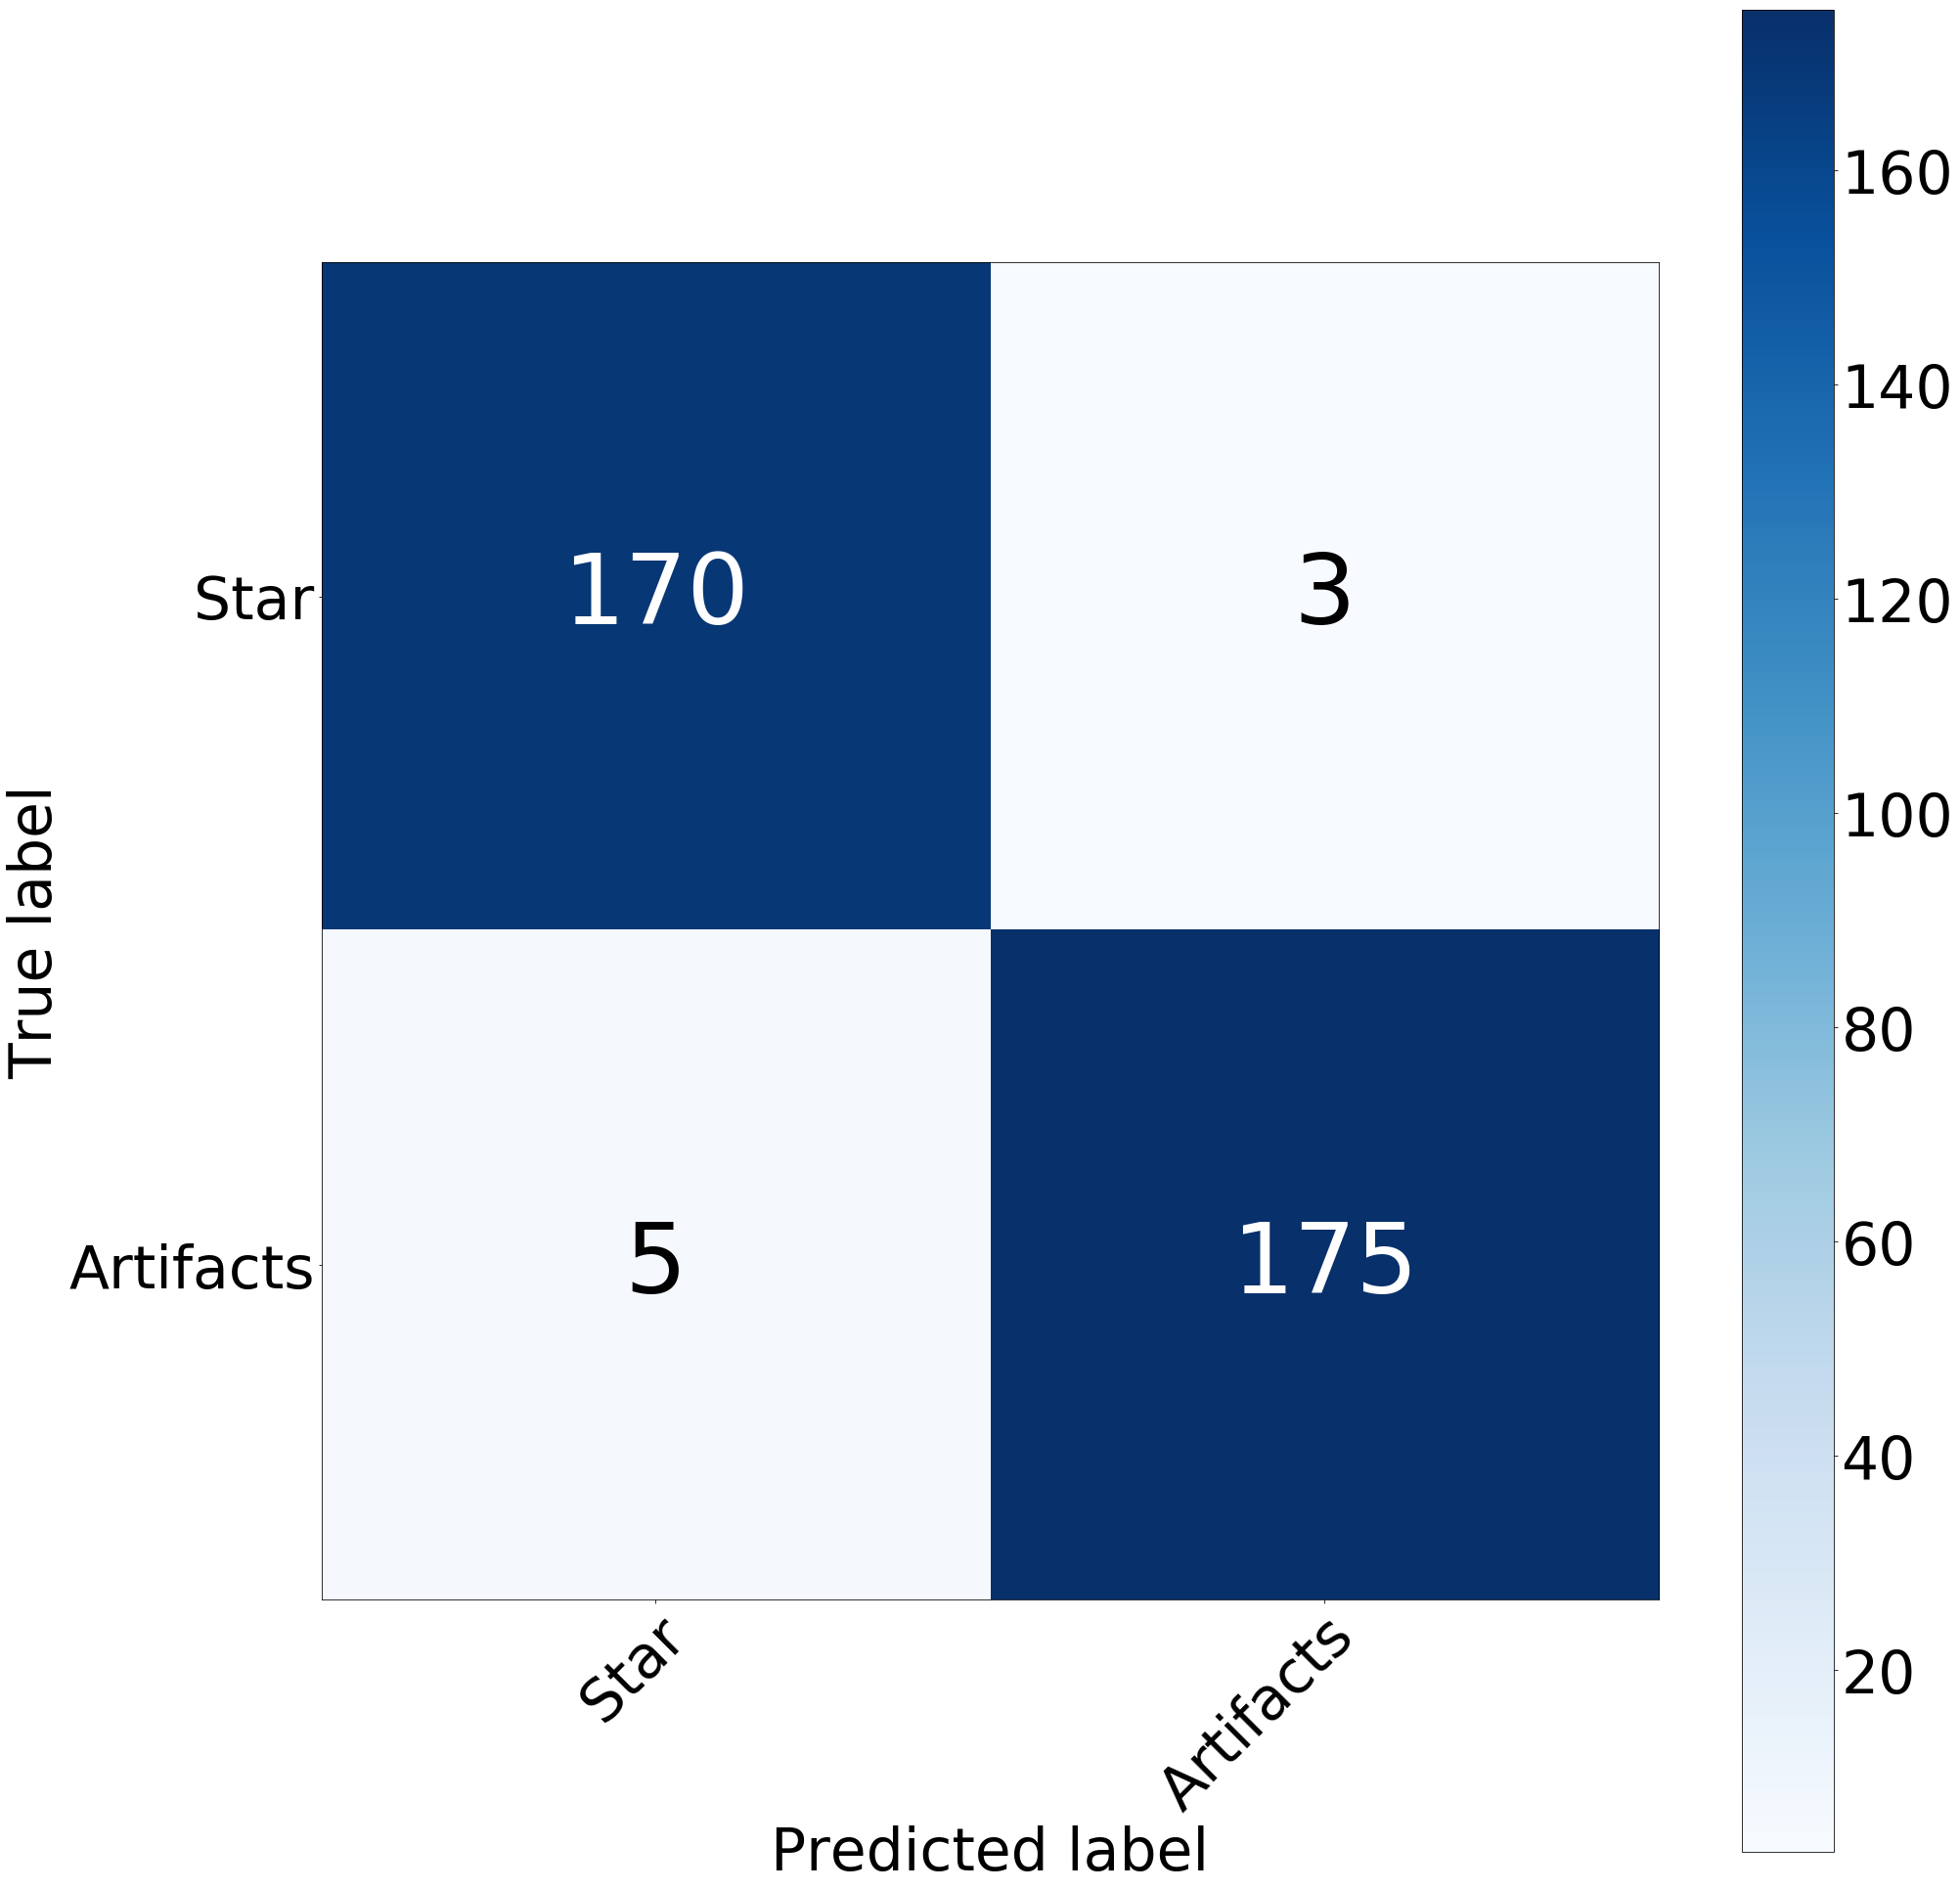

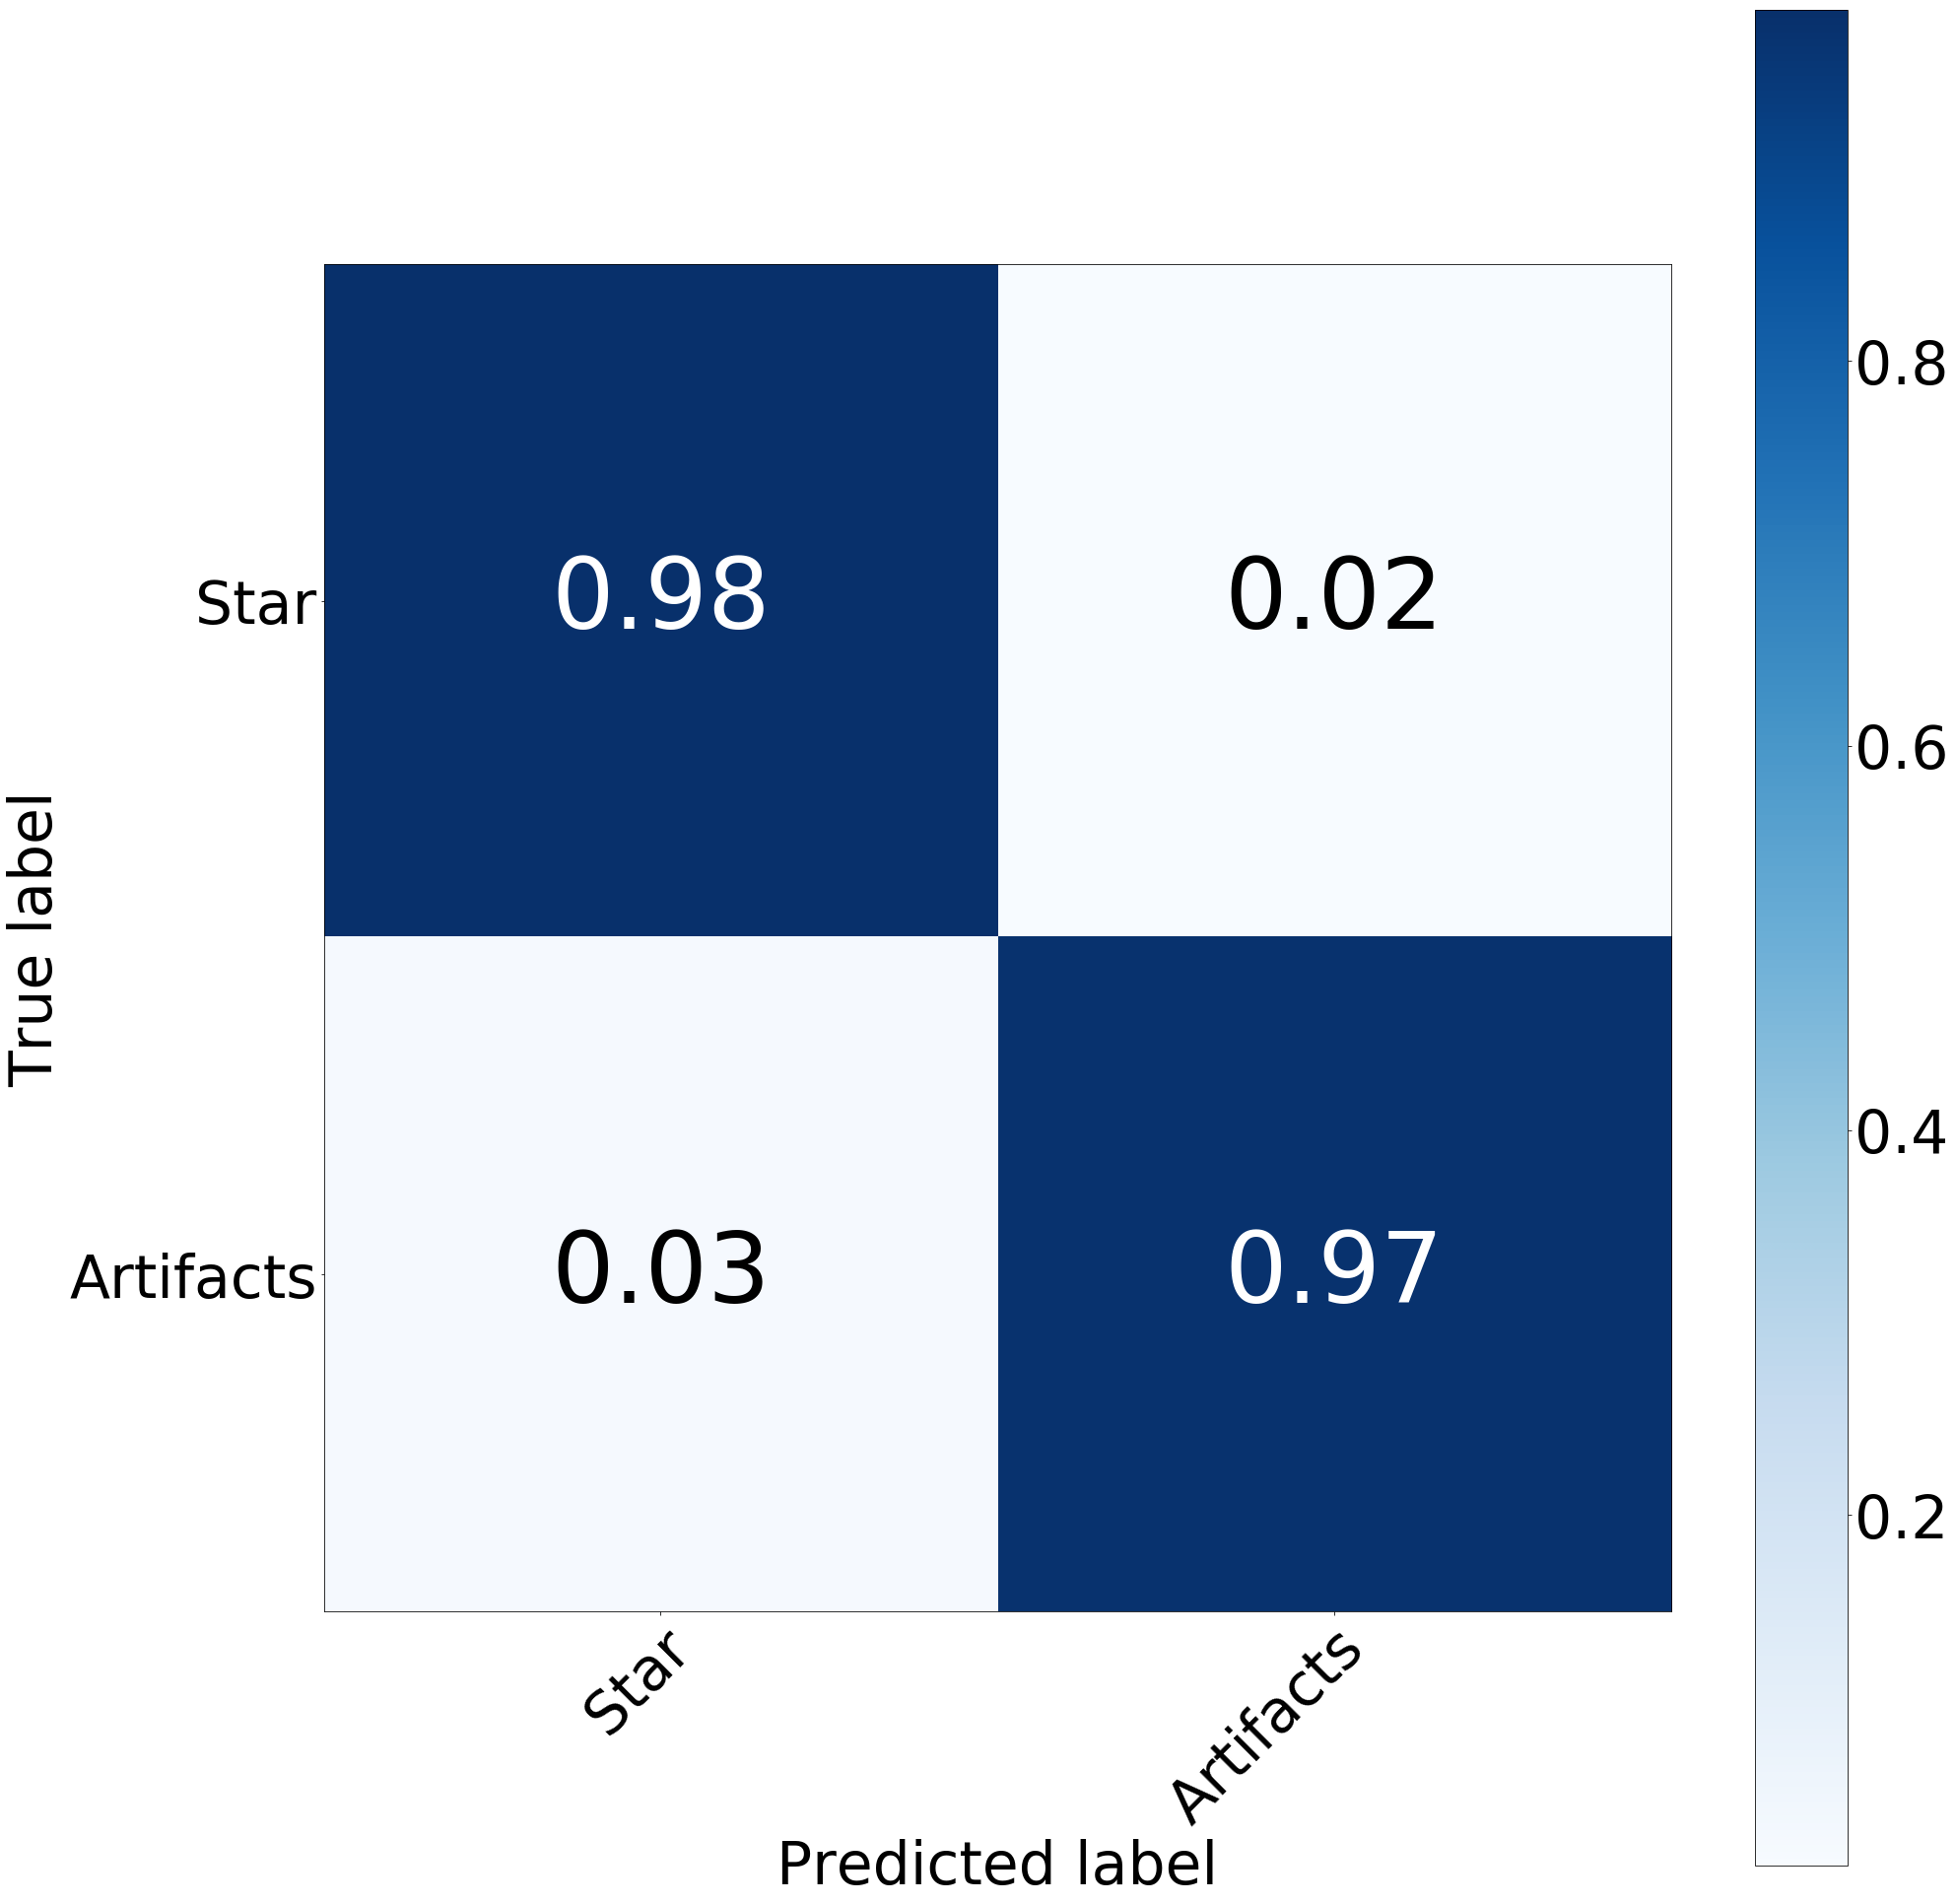

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names = np.array(['Star','Artifacts'])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    plt.rcParams["font.size"] = "60"
    plt.rcParams["figure.figsize"] = "30,30"
    plt.rcParams["axes.labelsize"] = "60"
    plt.rcParams["xtick.labelsize"] = "60"
    plt.rcParams["ytick.labelsize"] = "60"
    plt.rcParams["axes.labelsize"] = "60"
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = ''
        else:
            title = ''

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    ax.fontsize=100
    ax.titlesize=50
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.fontsize=60
    ax.figure.colorbar(im, ax=ax)

        # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label',)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),fontsize=100,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_val, yhat,classes=class_names,
                      title='')
plt.savefig('models/confusion_matrix_3conv.png',dpi=200)

# Plot normalized confusion matrix
plot_confusion_matrix(labels_val, yhat,classes=class_names, normalize=True)
#                      title='Normalized confusion matrix')
plt.savefig('models/normalized_confusion_matrix_3conv.png',dpi=200)

plt.show()


plt.rcParams["font.size"] = "10"
plt.rcParams["figure.figsize"] = "10,10"
plt.rcParams["axes.labelsize"] = "10"
plt.rcParams["xtick.labelsize"] = "10"
plt.rcParams["ytick.labelsize"] = "10"
plt.rcParams["axes.labelsize"] = "10"

In [15]:
#Small function to append the total number of true and false 
#negatives and positives 
def perf_measure(y_actual, y_hat):
    TP = []
    FP = []
    TN = []
    FN = []

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP.append(i)
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP.append(i)
        if y_actual[i]==y_hat[i]==0:
            TN.append(i)
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN.append(i)

    return(TP, FP, TN, FN)


tp,fp,tn,fn=perf_measure(labels_val,yhat)

# True Positives

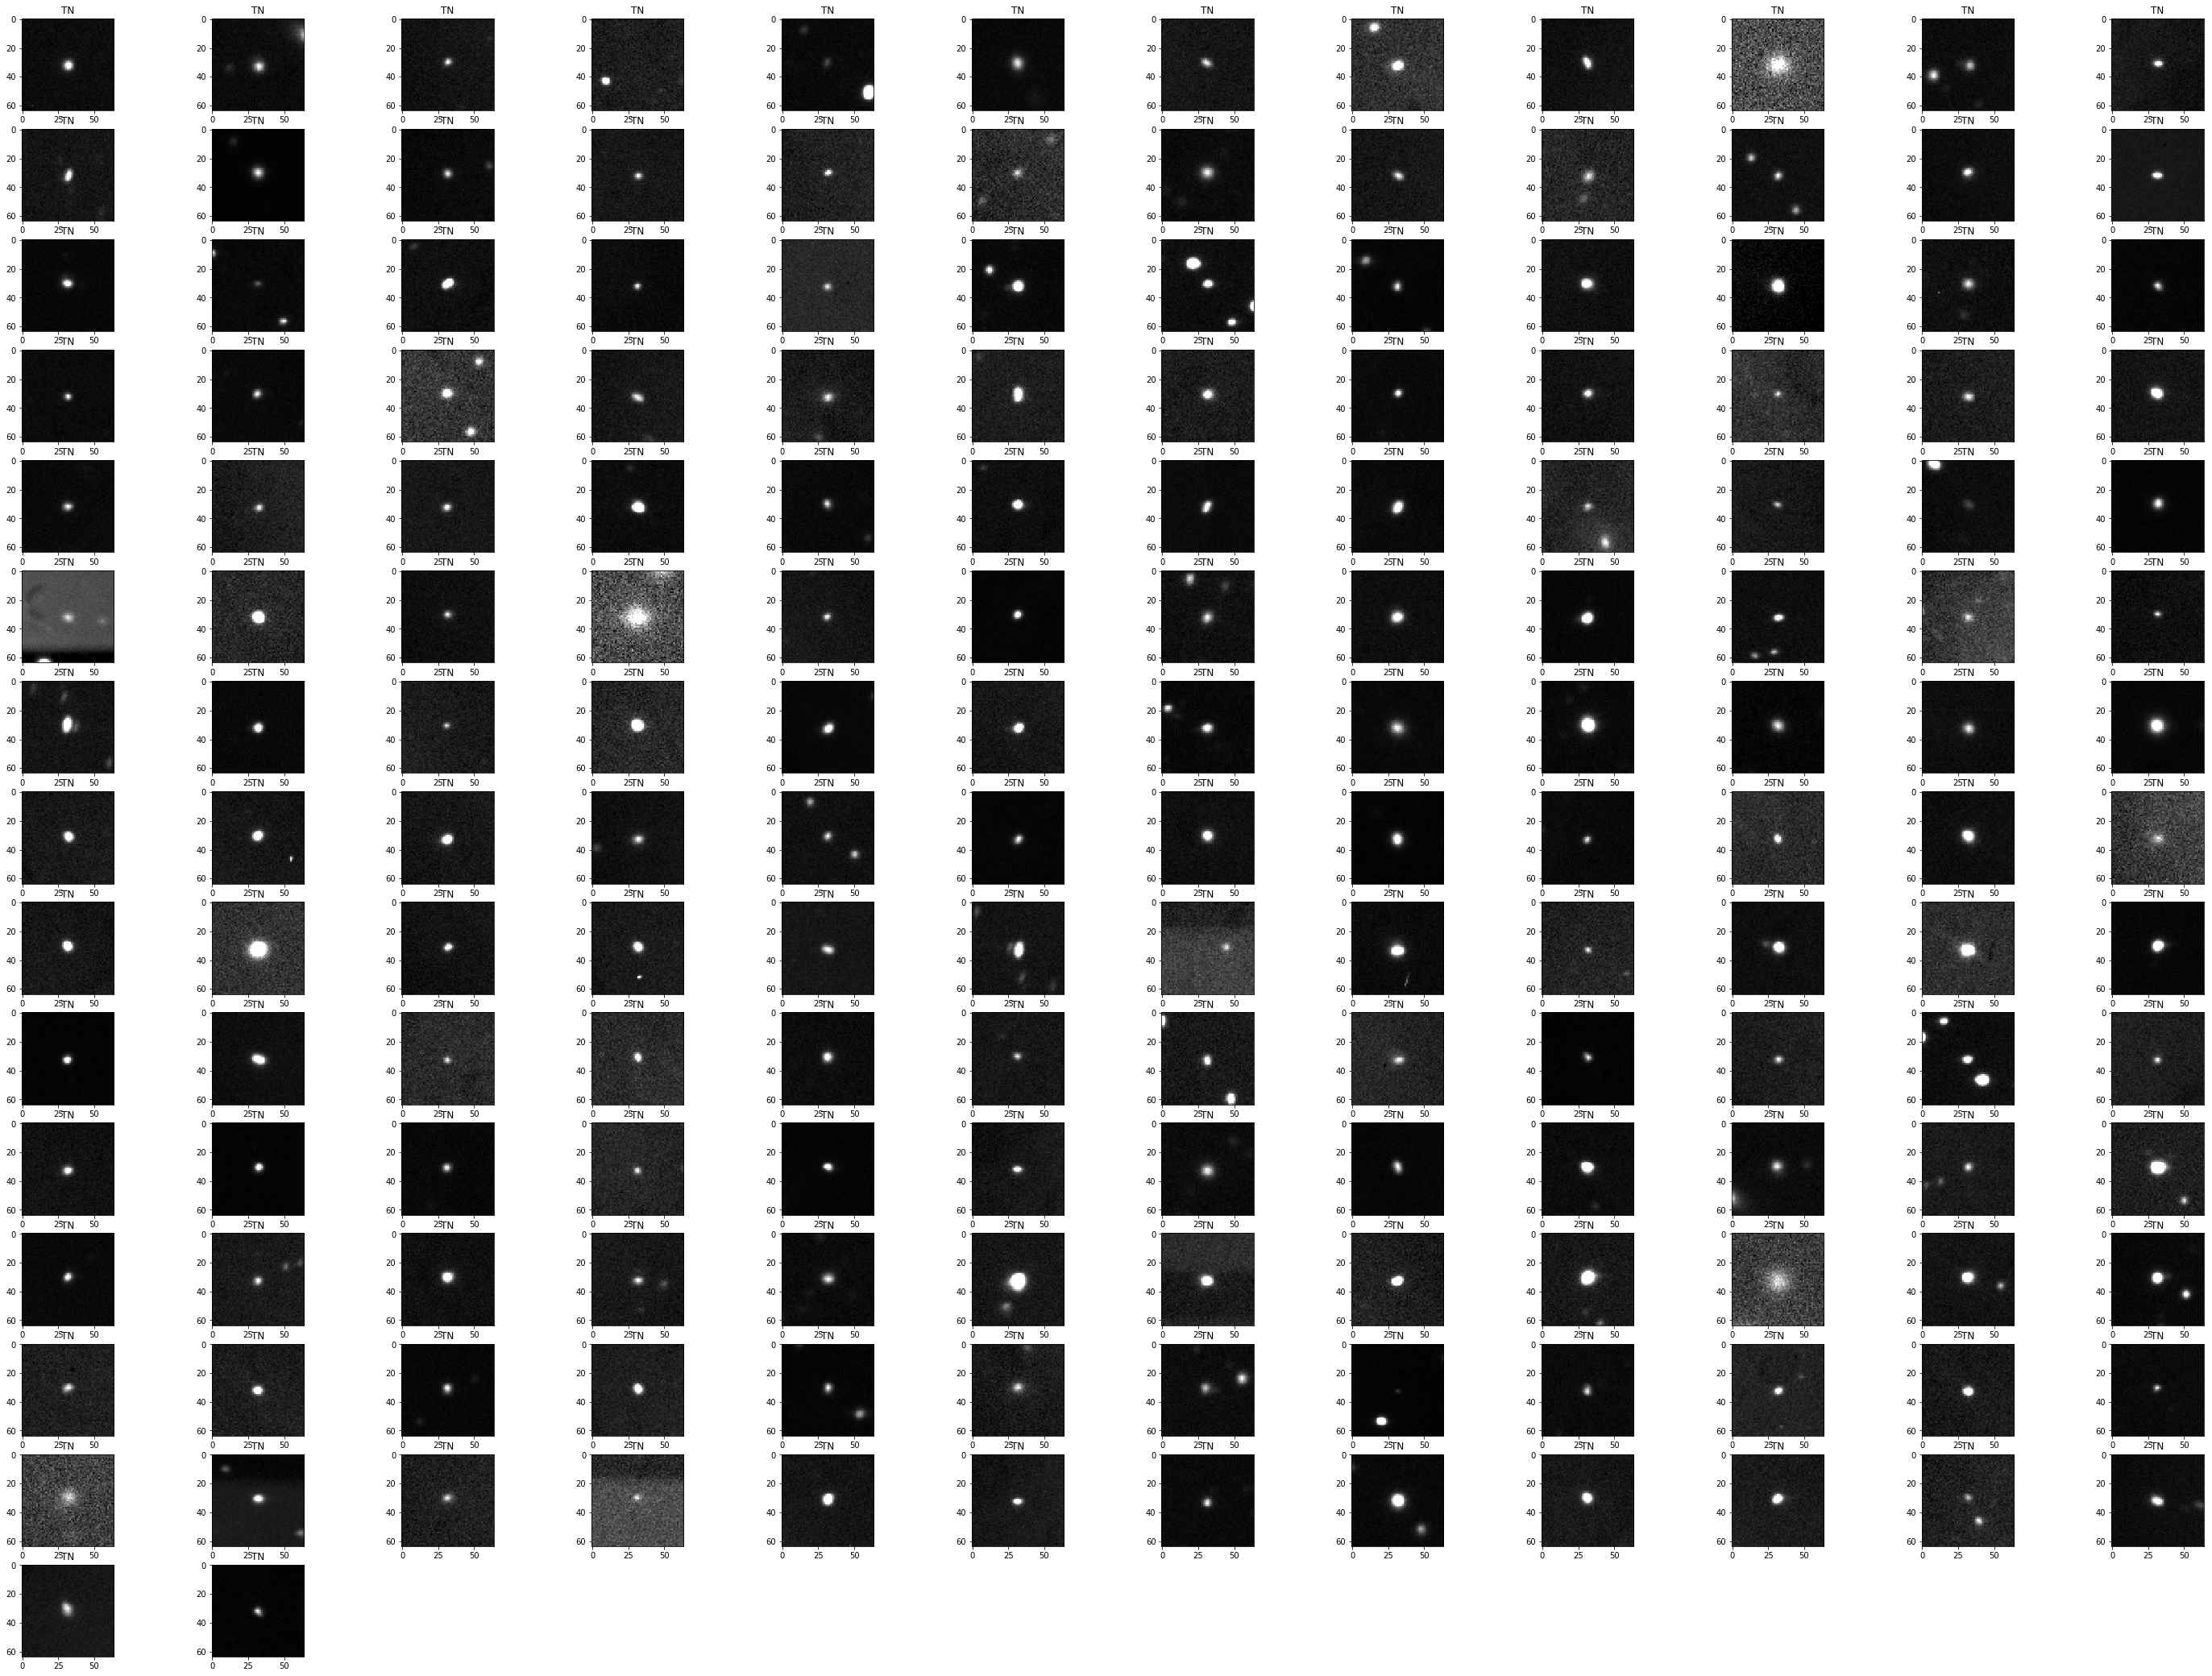

In [69]:
plt.figure(figsize=(50,50))


for i in range(conf[0][0]):
    
    plt.subplot(20,12,i+1)
    k=tn[i]
    temp = np.reshape(images_val[k],(64,64))
    plt.imshow(temp,cmap='gray')
    plt.title('TN')
#plt.savefig('TN.png',format='png',dpi=500)

# True Negatives

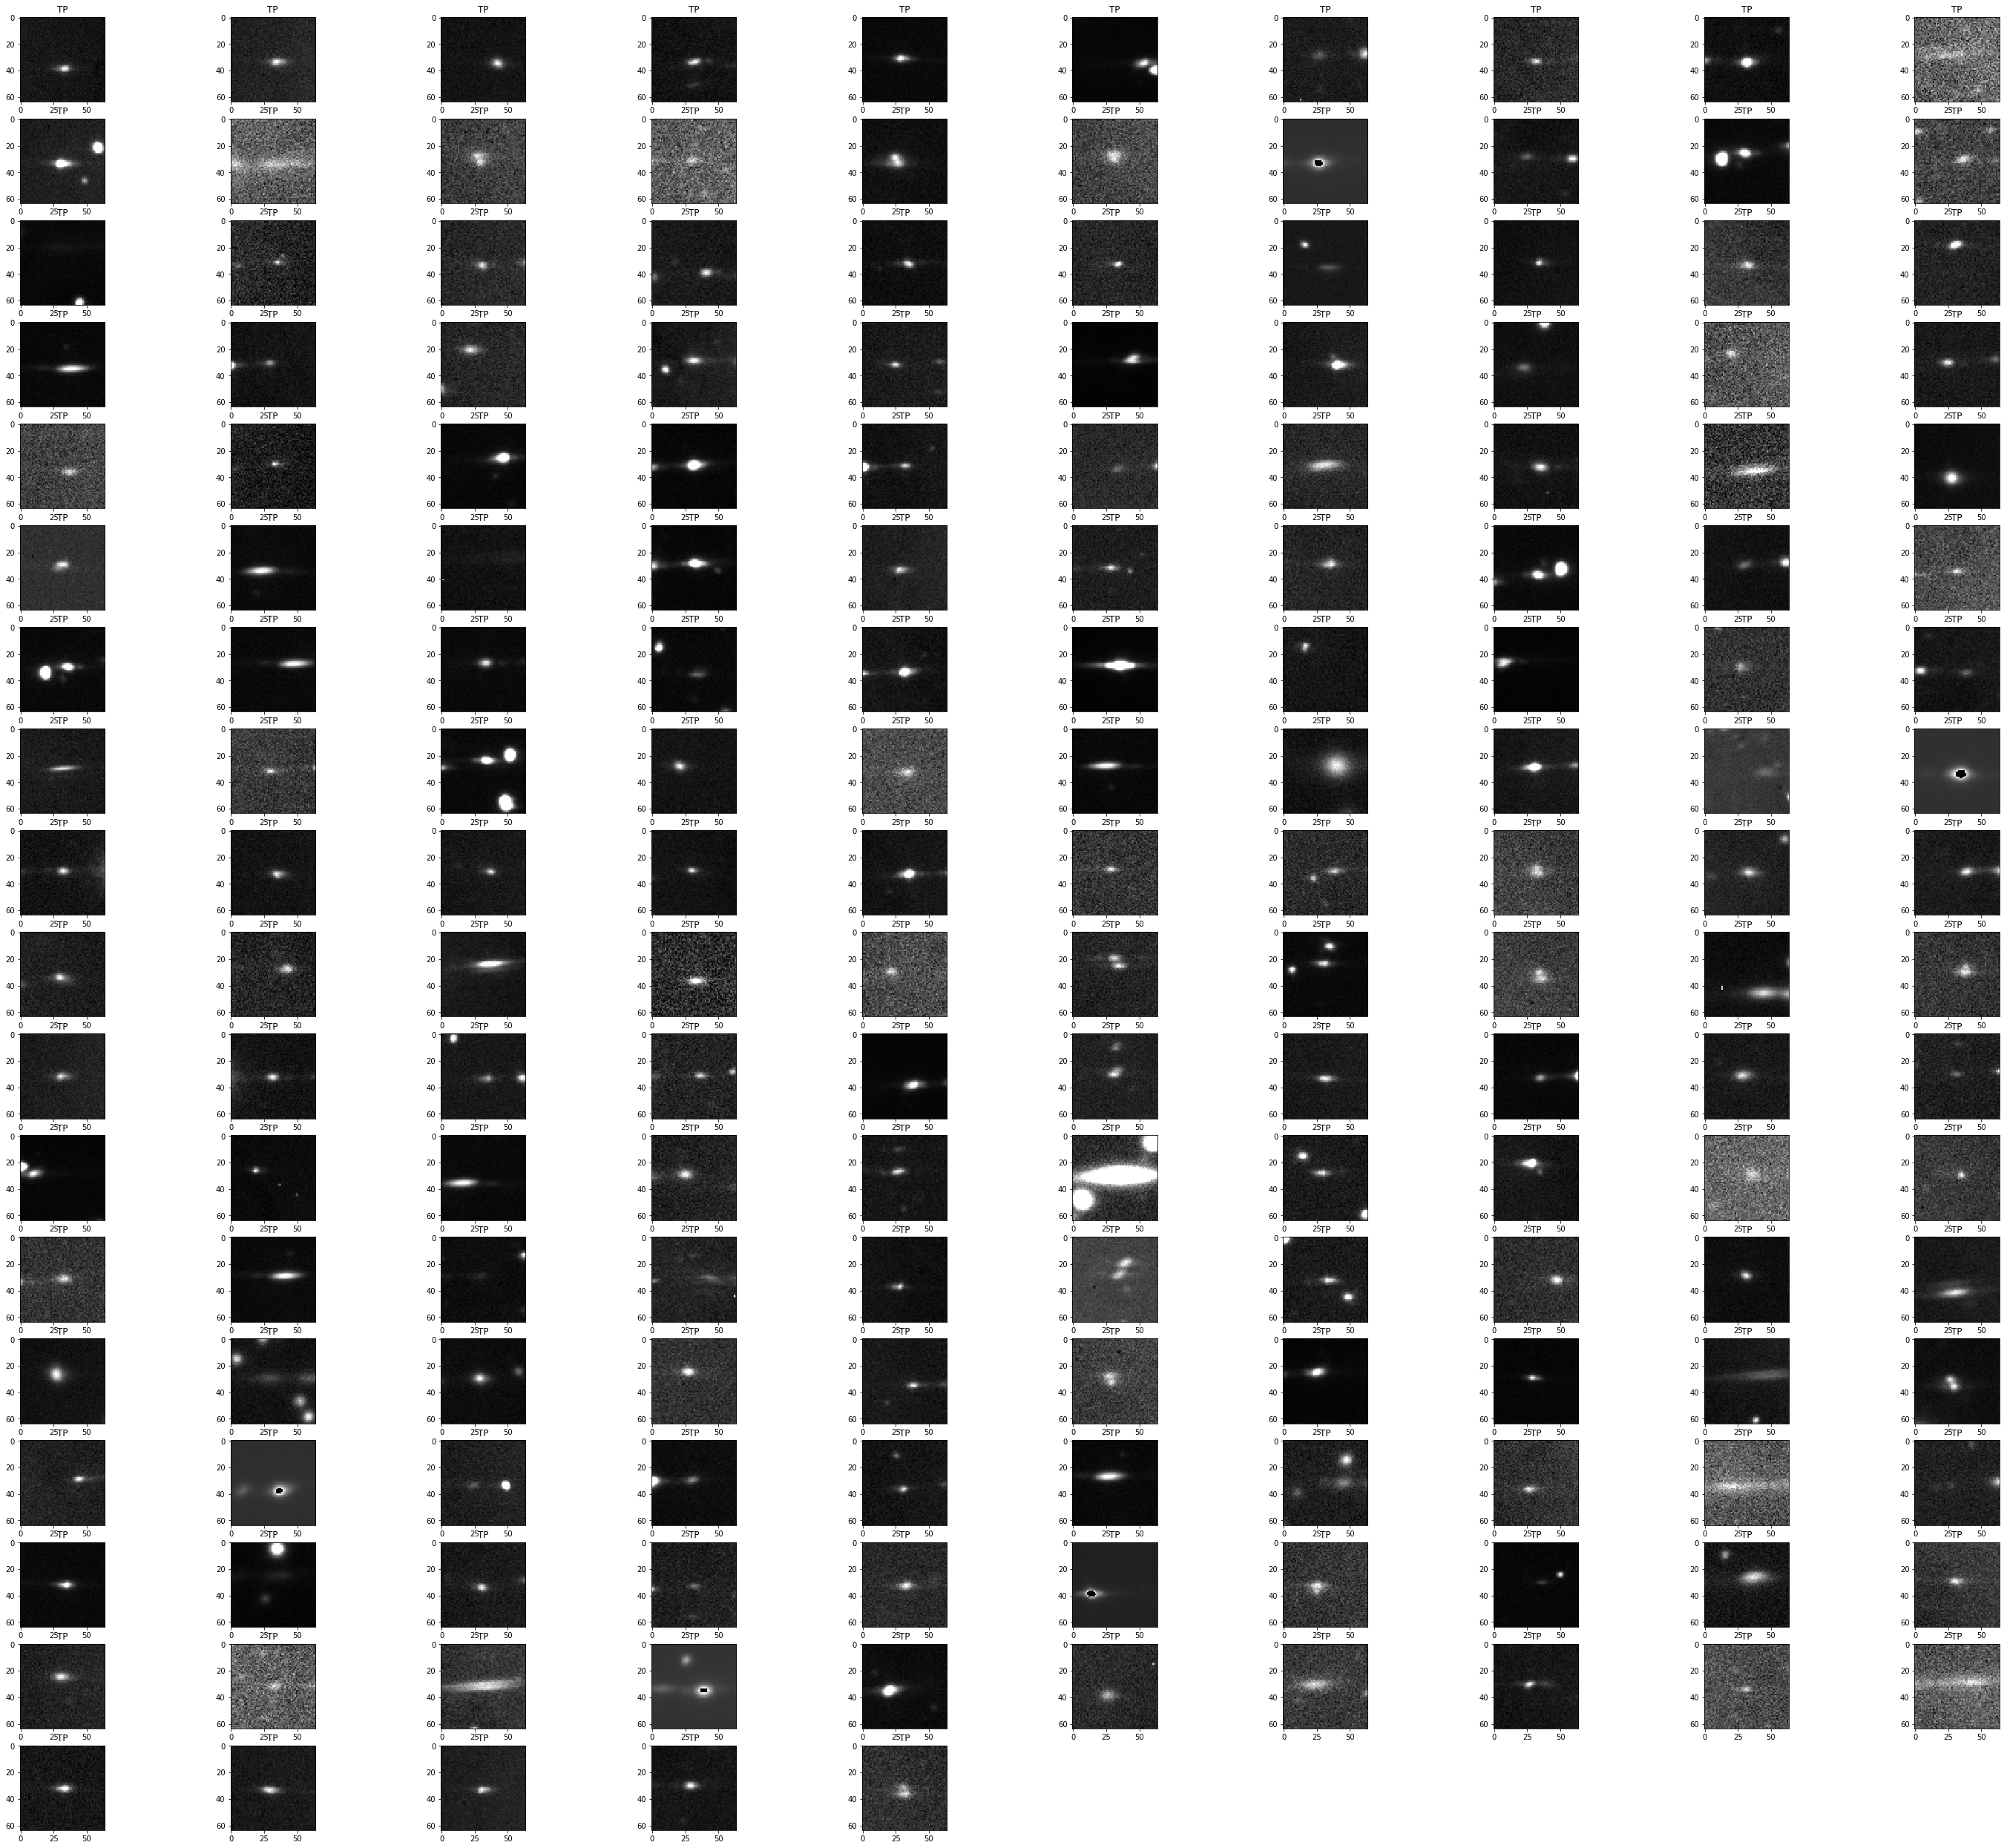

In [70]:
plt.figure(figsize=(50,50))


for i in range(conf[1][1]):
    
    plt.subplot(20,10,i+1)
    k=tp[i]
    temp = np.reshape(images_val[k],(64,64))
    plt.imshow(temp,cmap='gray')
    plt.title('TP')
#plt.savefig('TP.png',dpi=300,format='png')

# False Positives

./cutout/reflection_training/cut_arti_2_RBPLJ1551+5806_02_R_297.00_2013_10_06-17_50_06._499_1489_rot180.png
./cutout/challenge/cut_arti_14_RBPLJ1927+7358_00_R_96.00_2014_08_27-22_04_38._1453_153.png
./cutout/reflection_training/cut_arti_2_RBPLJ1542+6129_02_R_200.00_2013_07_19-22_14_27._1509_96.png
./cutout/challenge/cut_arti_9_RBPLJ1542+6129_00_R_122.00_2014_06_14-21_13_25._1519_116_rot180.png
./cutout/challenge/cut_arti_3_RBPLJ1604+5714_00_R_200.00_2013_10_06-18_05_21._279_1993_rot180.png


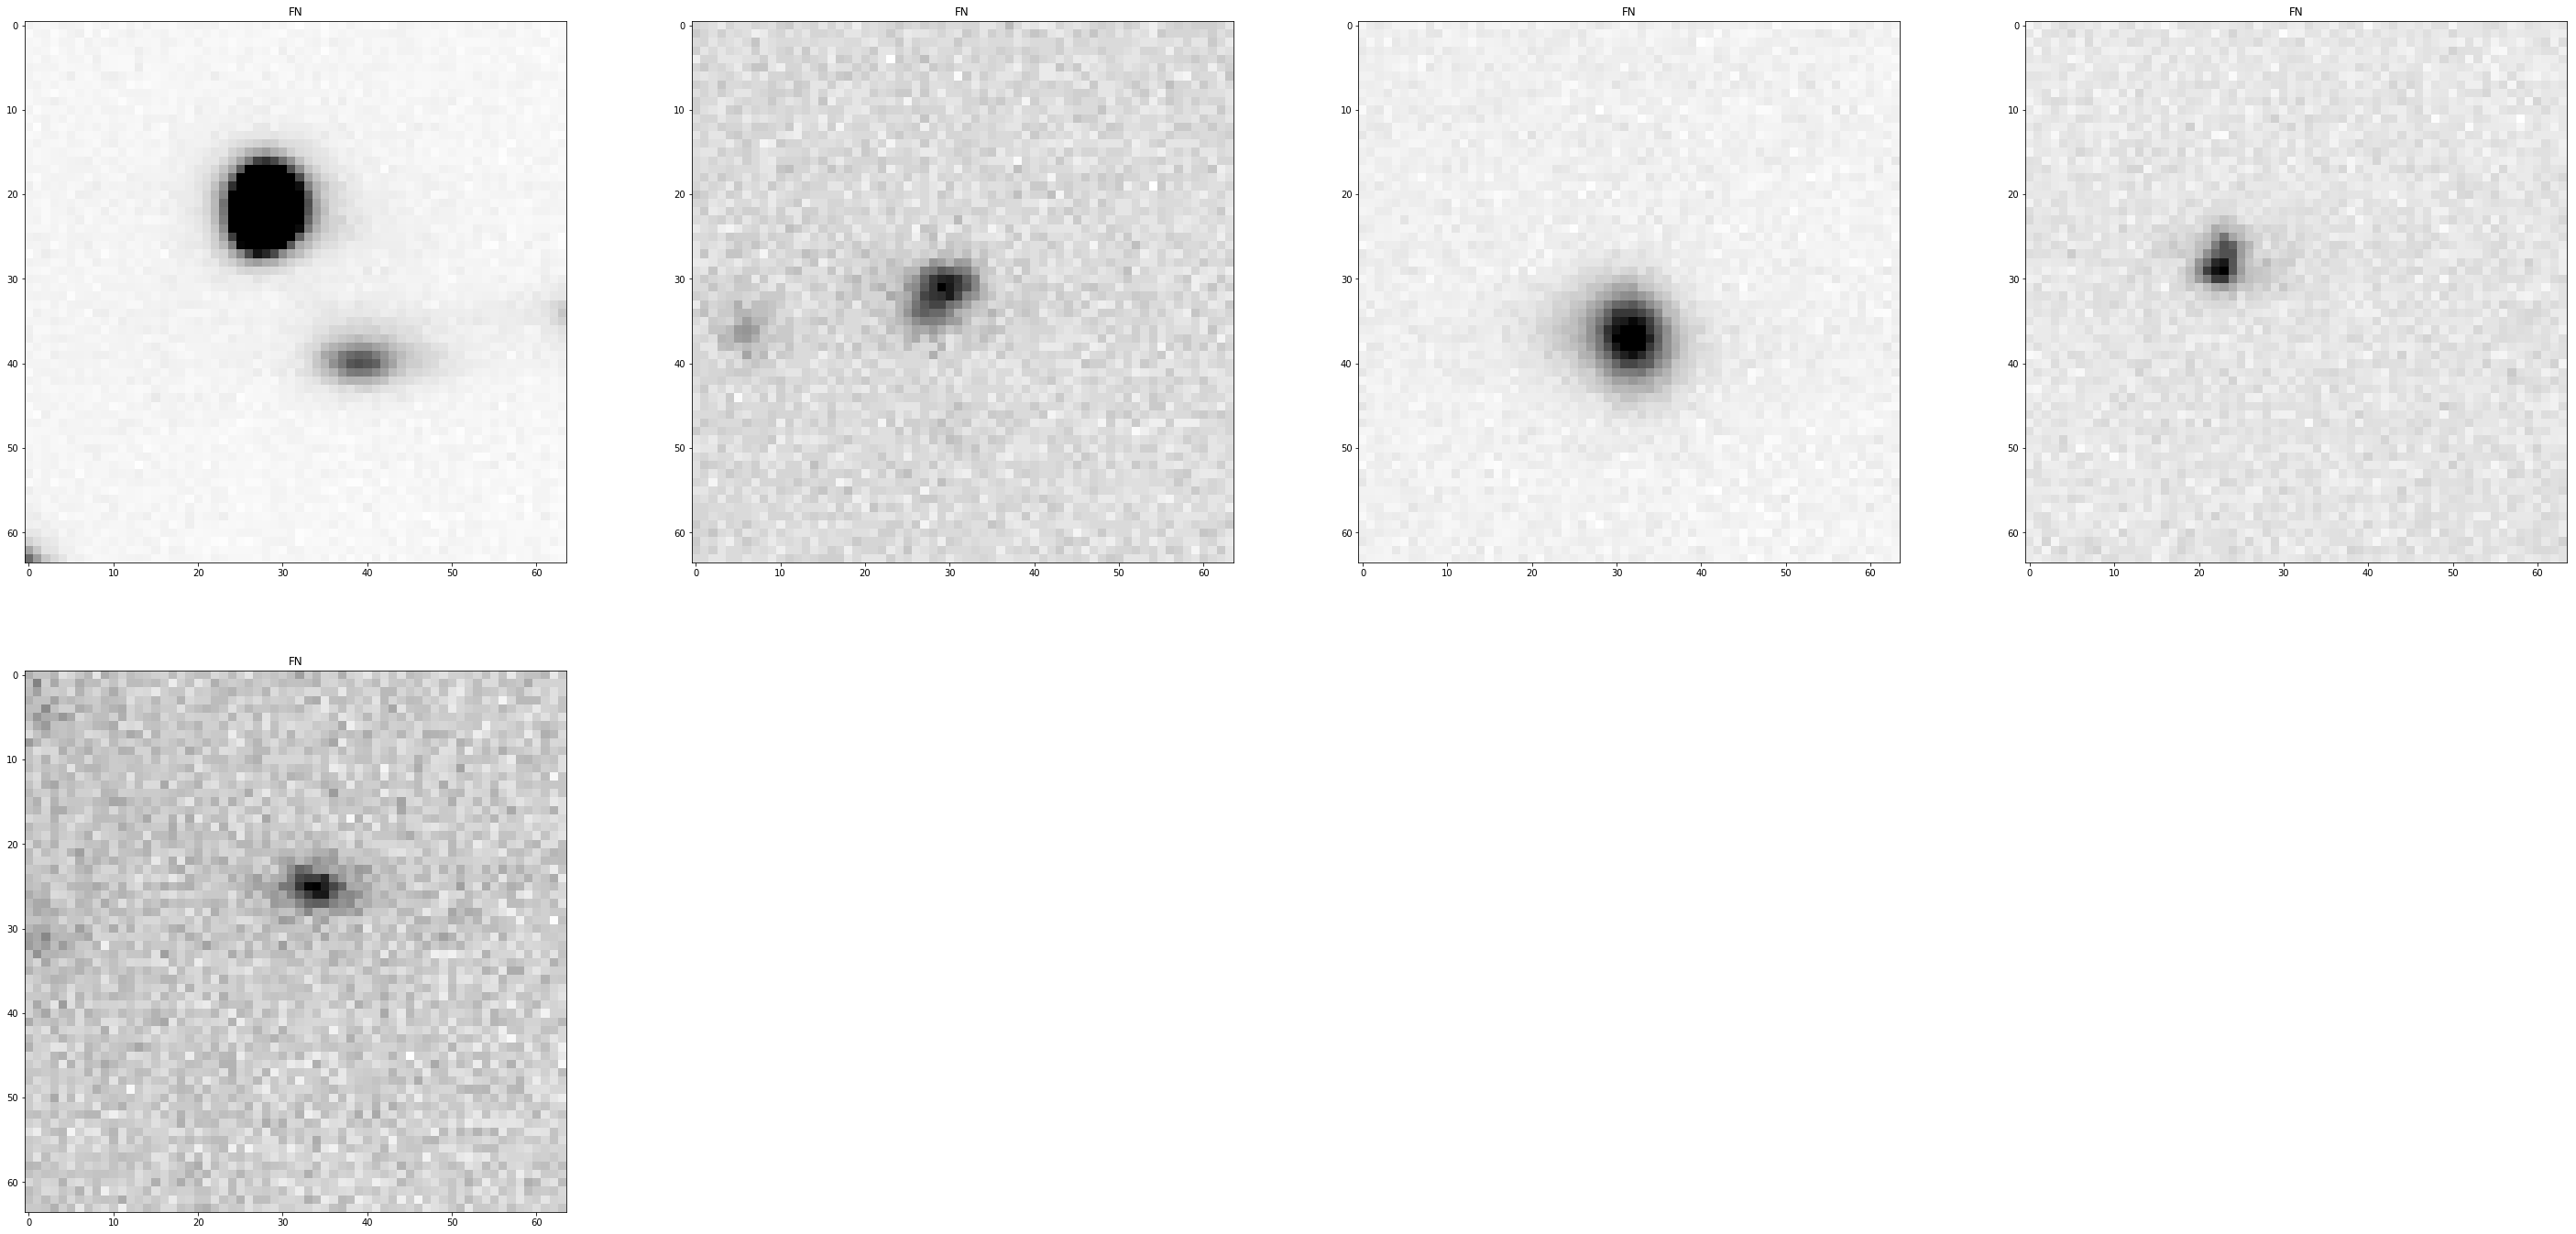

In [25]:
plt.figure(figsize=(50,50))


for i in range(conf[1][0]):
    
    plt.subplot(4,4,i+1)
    k=fn[i]
    temp = np.reshape(images_val[k],(64,64))
    print(name_val[k])
    plt.imshow(temp,cmap='gray_r')
    plt.title('FN')
#plt.savefig('FN.png',dpi=300,format='png')    

# False Negatives

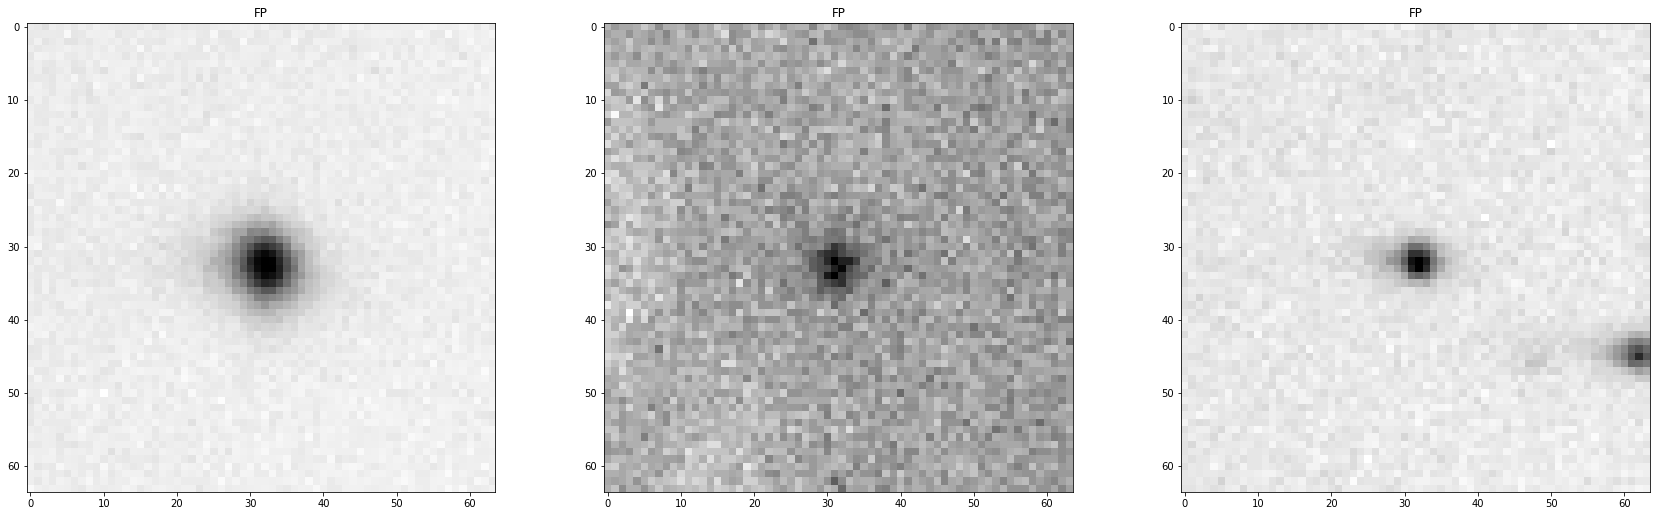

In [26]:
plt.figure(figsize=(50,50))


for i in range(conf[0][1]):
    
    plt.subplot(5,5,i+1)
    k=fp[i]
    temp = np.reshape(images_val[k],(64,64))

    plt.imshow(temp,cmap='gray_r')
    plt.title('FP')
#plt.savefig('FP.png',dpi=200,format='png')       

In [27]:
layer_dict = dict([(layer.name, layer) for layer in model2.layers]) 
#we make a dictionary of the layers in the model


layer_dict

{'conv2d_2': <keras.layers.convolutional.Conv2D at 0x1a3da155f8>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x1a3da15a20>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x1a3e086c50>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x1a3e0b0b38>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x1a3d72fe80>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x1a3e0eb6a0>,
 'flatten_1': <keras.layers.core.Flatten at 0x1a3e0eb320>,
 'dropout_1': <keras.layers.core.Dropout at 0x1a3e107ba8>,
 'dense_1': <keras.layers.core.Dense at 0x1a3e0b0780>,
 'dense_2': <keras.layers.core.Dense at 0x1a3e16dfd0>}

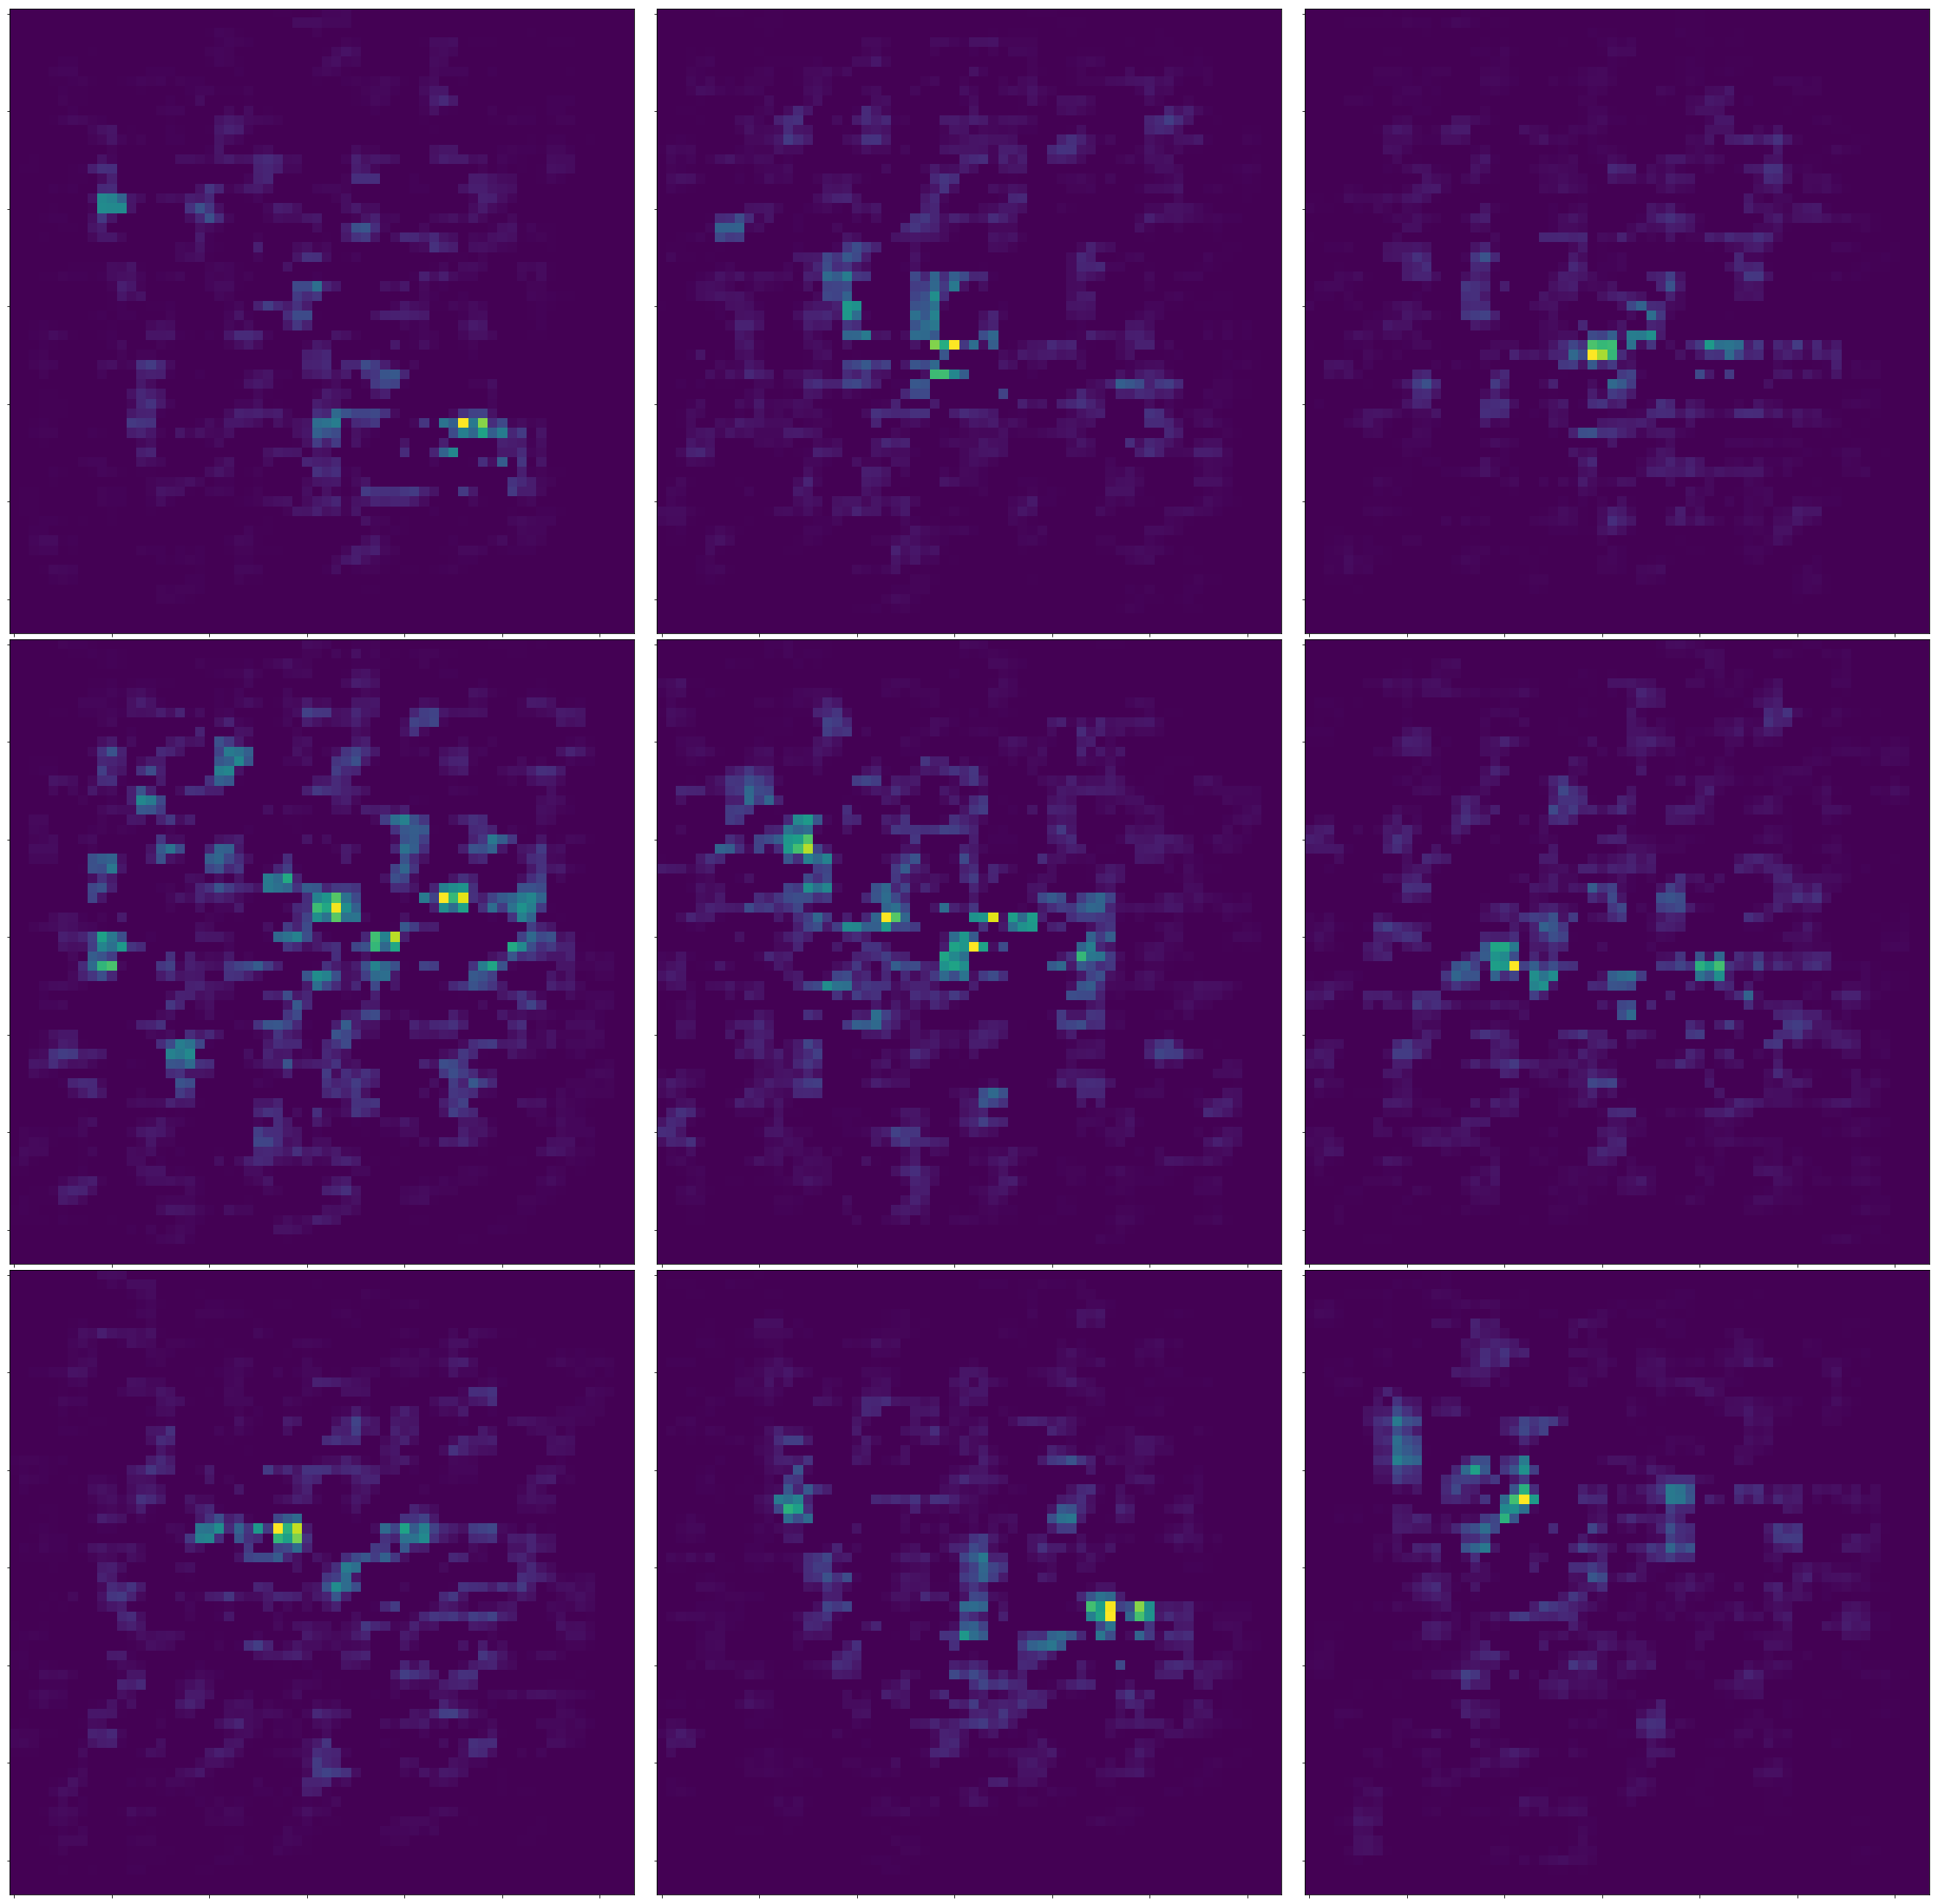

In [33]:
from vis.utils import utils #utility to find layers
from keras import activations #import activations package from keras 
from vis.visualization import visualize_saliency,visualize_cam 

layer_idx = utils.find_layer_idx(model2, 'dense_2') #We want to visualize the final dense layer. 
model2.layers[layer_idx].activation = activations.linear  
#change activation of final layer from sigmoid to linear
model2 = utils.apply_modifications(model2) #apply that modification to the model
filter_indices=0
saliency=new_images[1455:1464]
plt.rcParams["figure.figsize"] = [40,40]
plt.rcParams["axes.labelsize"] = 0
plt.rcParams["xtick.labelbottom"] = False
plt.rcParams["ytick.labelleft"] = False
plt.rcParams["xtick.labeltop"]=False


i=1
d=4

for seed in saliency:
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.subplot(3,3,i)
    new_im=visualize_saliency(model2,layer_idx, filter_indices=filter_indices, seed_input=seed, backprop_modifier=None,
                          grad_modifier="relu")
    plt.imshow(new_im,cmap='viridis')
    i+=1
    if(i==10):
        break
plt.savefig('saliency_artifacts.png',bbox='tight',dpi=100)



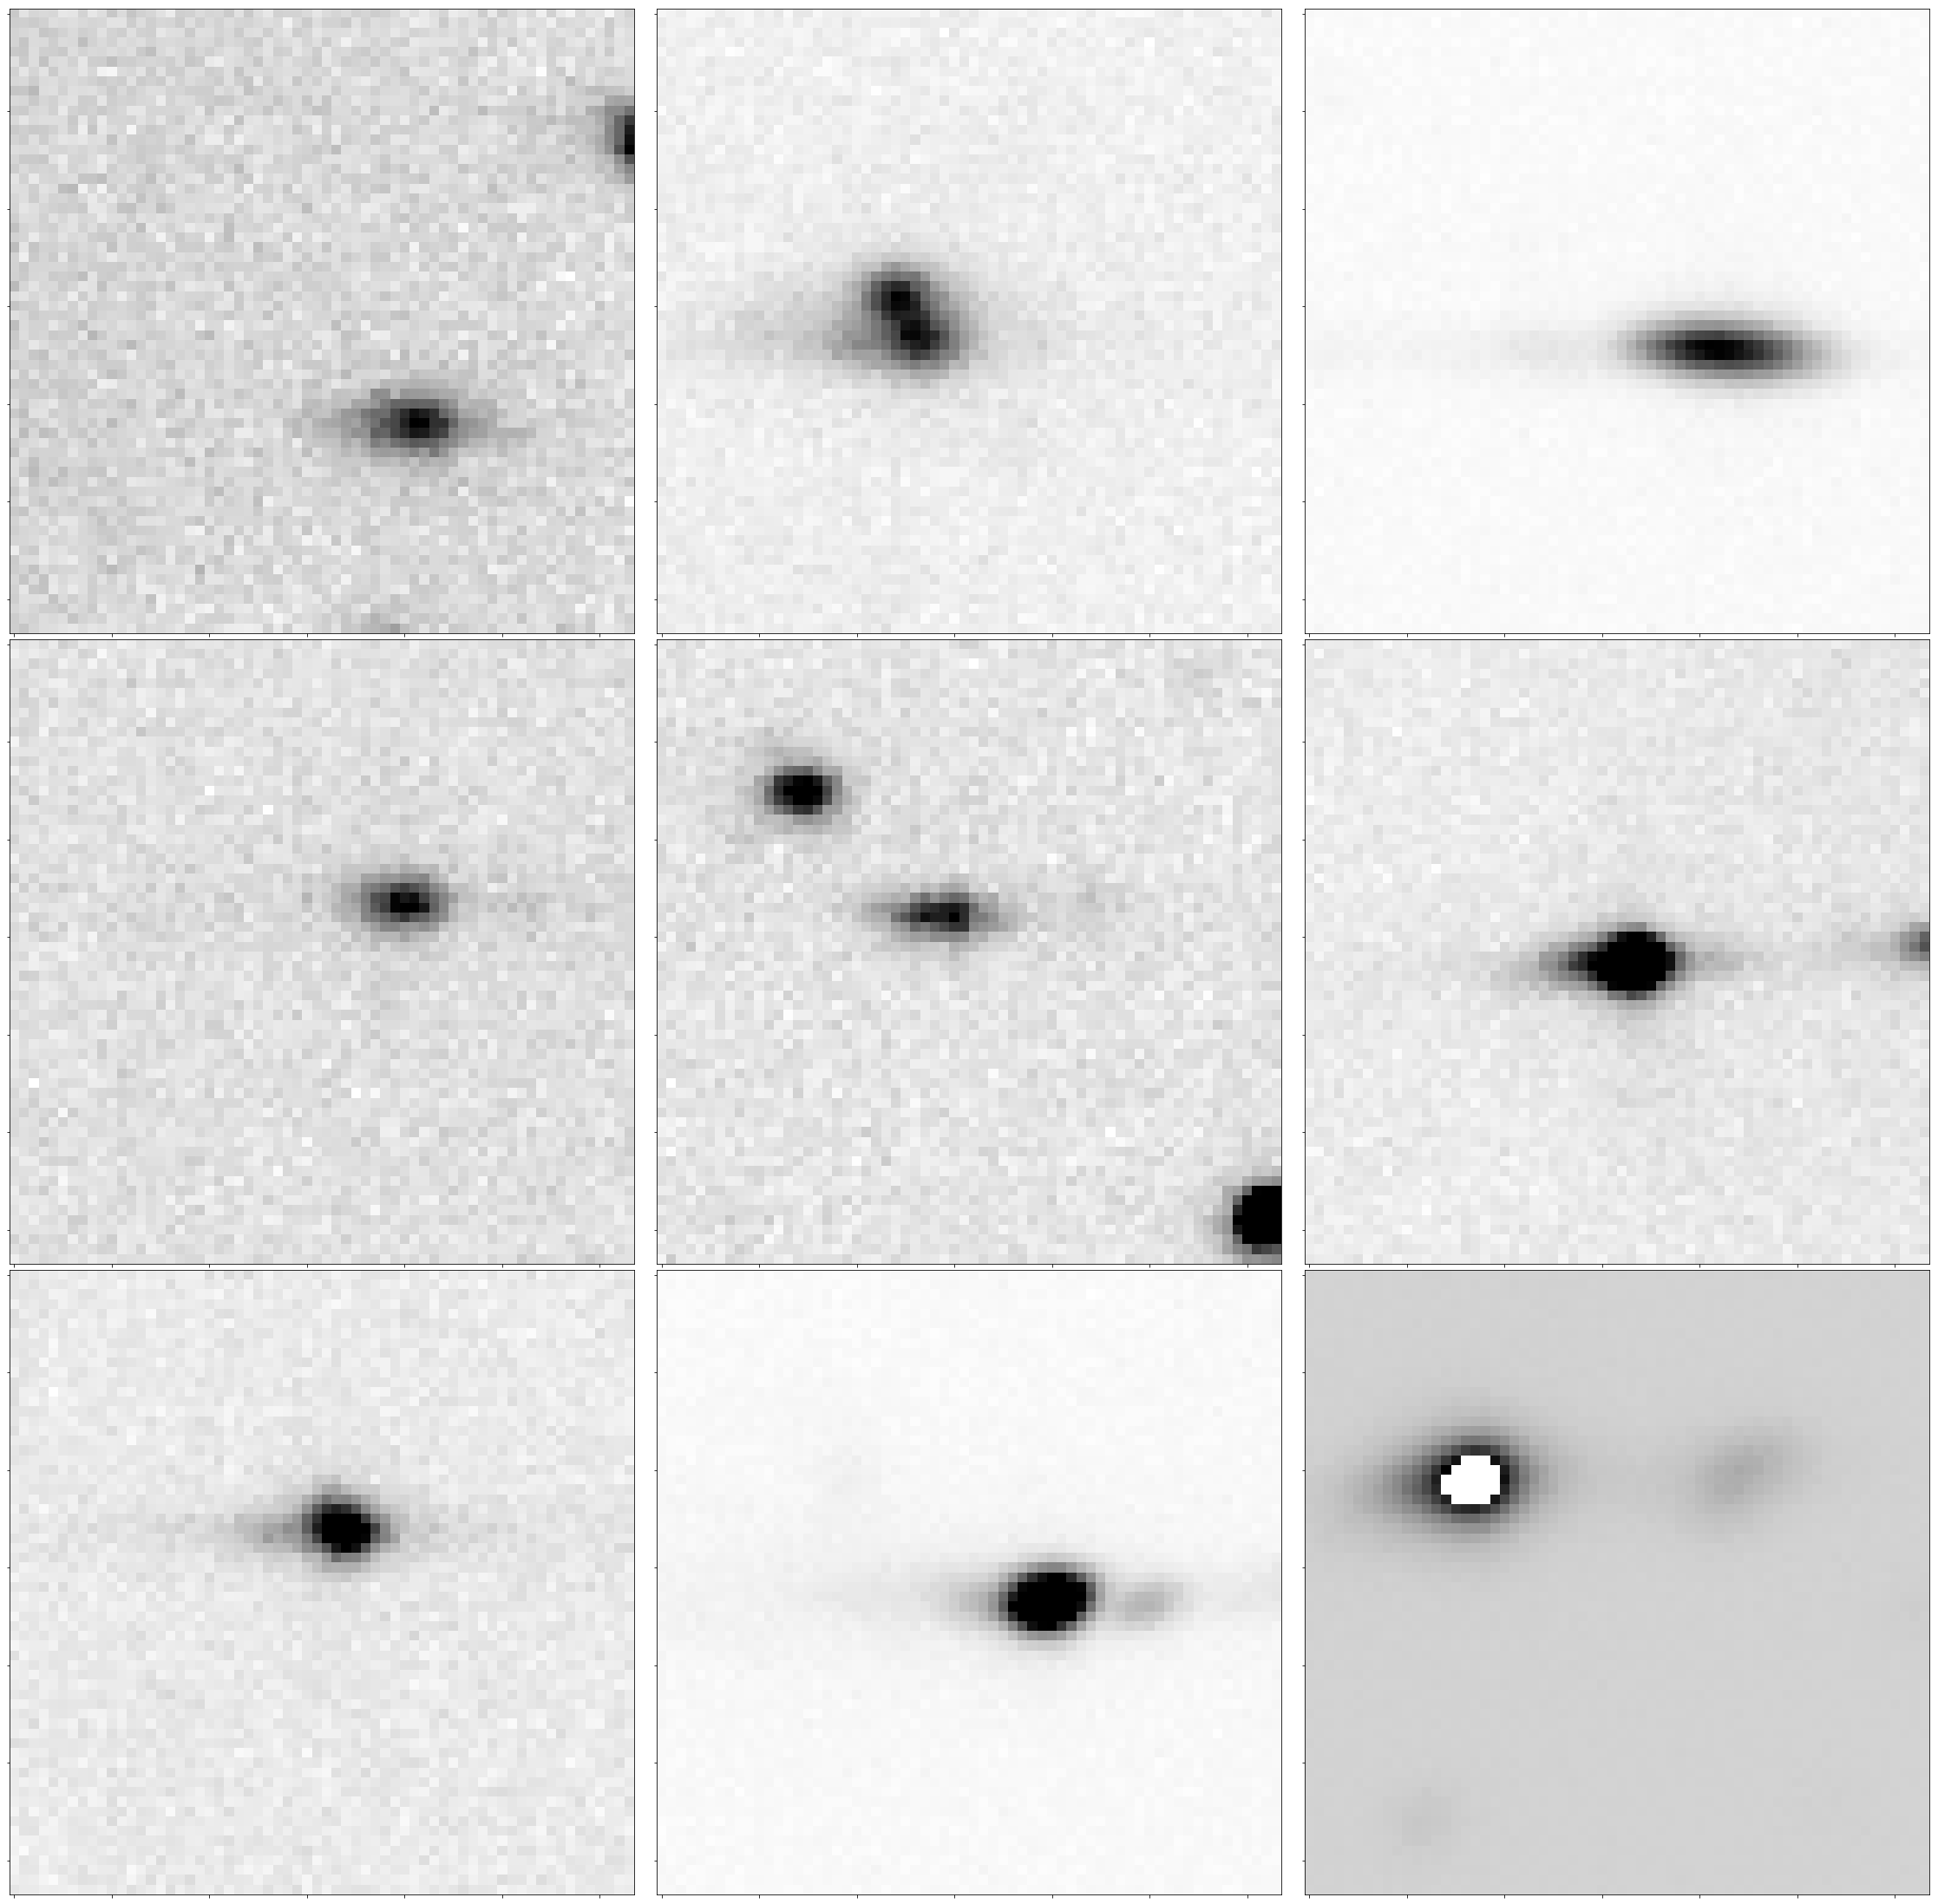

In [31]:
plt.rcParams["figure.figsize"] = [40,40]
i=1
for seed in saliency:
    temp=seed[:,:,0]
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.subplot(3,3,i)
    
    #new_im=visualize_saliency(model9,layer_idx, filter_indices=filter_indices, seed_input=seed, backprop_modifier=None,
                          #grad_modifier="absolute")
    plt.imshow(temp,cmap='gray_r')
    i+=1
    if(i==10):
        break

plt.savefig('artifacts_newcollage.png',bbox='tight')

In [16]:
nx,ny,channels=64,64,1 #shape of input data. It is 64x64 pixels and 1 channel


images_sources=[] #empty list which will be populated with images
labels_sources=[] #empty list which will have labels.

#Labels are either 1 or 0. 1 for artifacts, 0 for stars

def read_stars(list_images): #function to generate lists of data and labels
    images_sources=[]
    labels_sources=[]
    for img in list_images:
        
        
                    
        if 'cut_arti' in img: #if filename contains this string then append 1 to the labels list else 0
            images_sources.append(cv2.resize(cv2.imread(img, 0), (nx,ny), interpolation=cv2.INTER_CUBIC))
            #i=(np.rot90(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), (nx,ny), interpolation=cv2.INTER_CUBIC)))
            #i=np.rot90(i)
            #name=str(img[:-4])+'_rot180.png'
            #cv2.imwrite(name,i)
            #images.append(i)
            labels_sources.append(1)
            #labels.append(1)

        elif 'cut_star' in img:
            
            images_sources.append(cv2.resize(cv2.imread(img, 0), (nx,ny), interpolation=cv2.INTER_CUBIC))
            #j=(np.rot90(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), (nx,ny), interpolation=cv2.INTER_CUBIC)))
            #j=np.rot90(j)
            #name=str(img[:-4])+'_rot180.png'
            #cv2.imwrite(name,j)
            #images.append(j)
            #labels.append(0)
            labels_sources.append(0)
                        
    return images_sources,labels_sources



In [17]:
star_test = "./cutout/test/stars/"

star_test_images = ['./cutout/test/stars/{}'.format(i) for i in os.listdir(star_test) if '.png' in i]

arti_test = "./cutout/test/artifacts/"

arti_test_images = ['./cutout/test/artifacts/{}'.format(i) for i in os.listdir(arti_test) if '.png' in i]


In [18]:
test_star_images, test_star_labels = read_stars(star_test_images)

test_star_images = np.array(test_star_images).reshape(17,64,64,1)
test_star_labels = np.array(test_star_labels)
len(test_star_images)

17

In [19]:
test_star_generator = val_datagen.flow(test_star_images, test_star_labels, batch_size=1)
len(test_star_generator)

17

In [20]:
test_arti_images, test_arti_labels = read_stars(arti_test_images)
test_arti_images = np.array(test_arti_images).reshape(14,64,64,1)
test_arti_labels = np.array(test_arti_labels)
test_arti_generator = val_datagen.flow(test_arti_images, test_arti_labels, batch_size=1)
len(test_arti_generator)

14

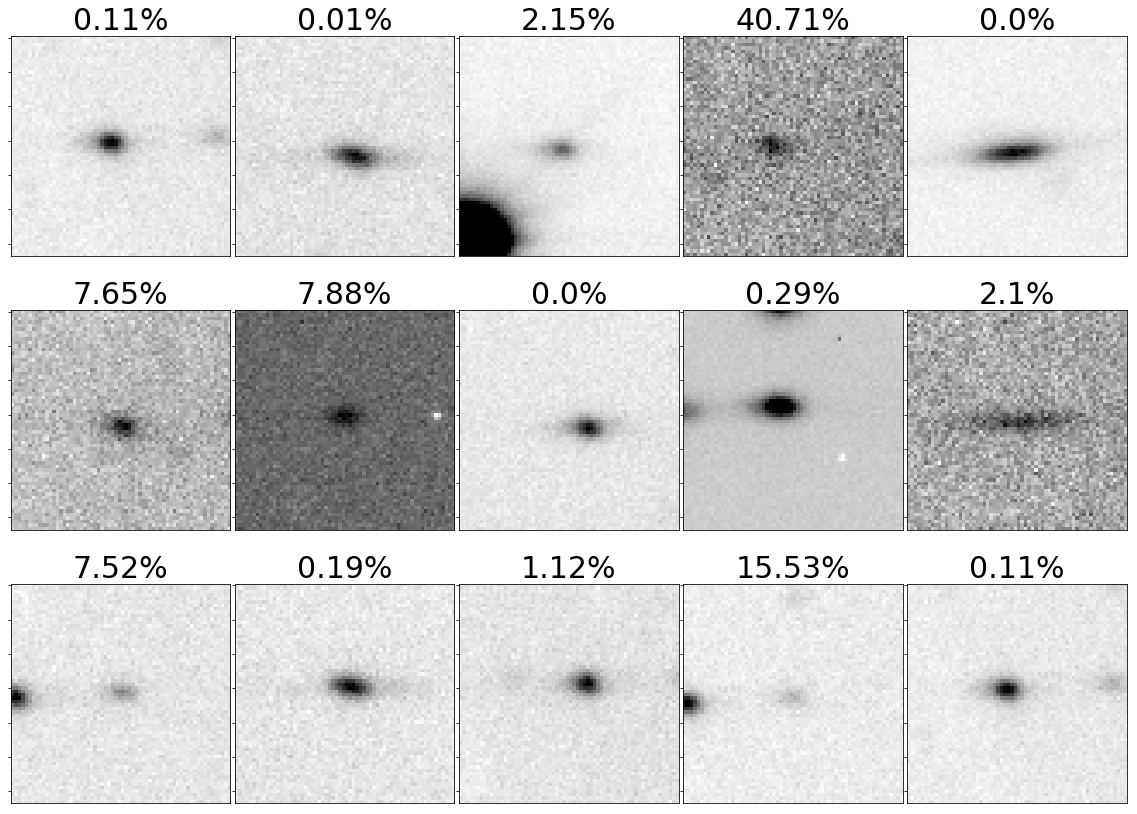

In [21]:
s=0
y_stars=[]
y_artifacts=[]
y_prob=[]
star_prob=[]
arti_prob=[]

plt.figure(figsize=(20,20))

for batch in val_datagen.flow(test_arti_images,batch_size=1,shuffle=False):
    
    pr=model2.predict(batch)
    
    plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,labelleft=False)
    plt.subplots_adjust(wspace=0.02,hspace=0.03)

    if pr>0.5:
        
        plt.subplot(4,5,s+1)
        temp = np.reshape(batch[0],(64,64))

        plt.imshow(temp,cmap='gray_r')
        per=str(round(100 - (pr[0][0])*100,2))+'%'
        
        plt.title(per,fontsize=30)
        
        y_stars.append(1)
    
        y_prob.append(pr)

        plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,labelleft=False)
        
    else:
        plt.subplot(4,5,s+1)
        temp = np.reshape(batch[0],(64,64))

        plt.imshow(temp,cmap='gray_r')
        per=str(round(100 - (pr[0][0]*100),2))+'%'
        plt.title(per,fontsize=30)
        y_prob.append(pr)
        y_stars.append(0)
        plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,labelleft=False)

    s+=1
    if(s==15):
        break

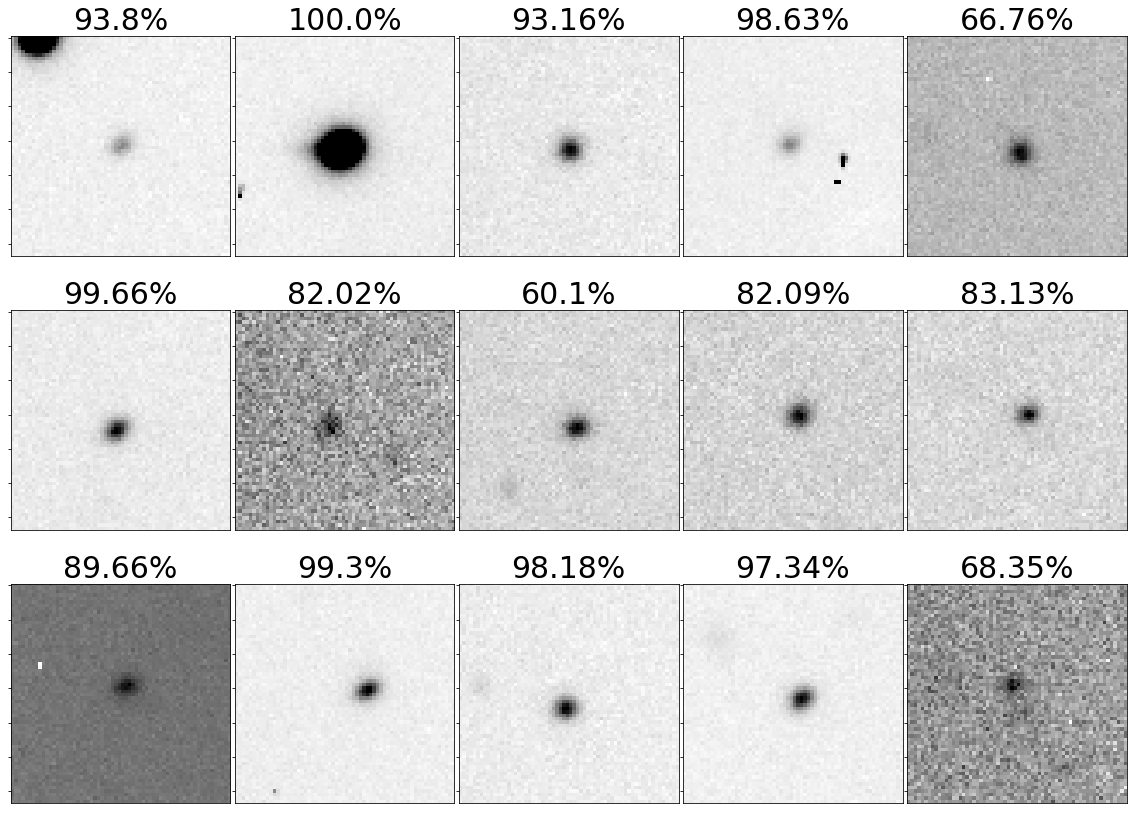

In [22]:
s=0
y_stars=[]
y_artifacts=[]
y_prob=[]
star_prob=[]
arti_prob=[]

plt.figure(figsize=(20,20))

for batch in val_datagen.flow(test_star_images,batch_size=1,shuffle=False):
    
    pr=model2.predict(batch)
    
    plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,labelleft=False)
    plt.subplots_adjust(wspace=0.02,hspace=0.03)

    if pr>0.5:
        
        plt.subplot(4,5,s+1)
        temp = np.reshape(batch[0],(64,64))

        plt.imshow(temp,cmap='gray_r')

        per=str(round(100 - (pr[0][0])*100,2))+'%'
        
        plt.title(per,fontsize=30)
        
        y_stars.append(1)
    
        y_prob.append(pr)

        plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,labelleft=False)
        
    else:
        plt.subplot(4,5,s+1)
        temp = np.reshape(batch[0],(64,64))

        plt.imshow(temp,cmap='gray_r')

        per=str(round(100 - (pr[0][0]*100),2))+'%'
        plt.title(per,fontsize=30)
        y_prob.append(pr)
        y_stars.append(0)
        plt.tick_params(axis='both',which='both',bottom=False,labelbottom=False,labelleft=False)

    s+=1
    if(s==15):
        break

In [38]:
sources=[]
source_test_images="./testing_script/extraction/mags/"

sources=['./testing_script/extraction/mags/{}'.format(i) for i in os.listdir(source_test_images) if '.png' in i]
len(sources)

73

In [39]:
names_of_stars = []
for name in sources:
    start=name.find('cut_')
    stop=name.find('mag_')
    names_of_stars.append((name[start+12:stop]+'.fits'))

In [40]:
mag=[]
for s in sources:
    start=s.find('mag_')
    mag.append(float((s[start+4:-4])))
    

In [41]:
mag_list=np.array(mag)

source,source_labels=read_stars(sources)

In [ ]:
sat = cv2.imread('sat.png',0)
sat = cv2.resize(sat,(64,64))


In [ ]:
source.append(sat)

In [ ]:
source_labels.append(1)

In [ ]:
sat_2 = cv2.imread('sat_2.png',0)
sat_2 = cv2.resize(sat_2,(64,64))

In [ ]:
bleed_1 = cv2.imread('bleed_1.png',0)
bleed_1 = cv2.resize(bleed_1,(64,64))

bleed_2 = cv2.imread('bleed_2.png',0)
bleed_2 = cv2.resize(bleed_2,(64,64))

bleed_3 = cv2.imread('bleed_3.png',0)
bleed_3 = cv2.resize(bleed_3,(64,64))

gal = cv2.imread('galaxy.png',0)
gal = cv2.resize(gal,(64,64))

gal2 = cv2.imread('gal2.png',0)
gal2 = cv2.resize(gal2,(64,64))




In [ ]:
source.append(sat_2)
source_labels.append(1)
source.append(bleed_1)
source_labels.append(1)
source.append(bleed_2)
source_labels.append(1)
source.append(bleed_3)
source_labels.append(1)
source.append(gal)
source_labels.append(1)
source.append(gal2)
source_labels.append(1)

In [37]:
source=np.array(source)

source_labels=np.array(source_labels)

NameError: name 'source' is not defined

In [42]:
len(source)

73

In [46]:
source = np.array(source).reshape(73,64,64,1)
source_labels = np.array(source_labels)

In [47]:
source.shape
source_labels.shape

(73,)

In [48]:
source_generator = val_datagen.flow(source, source_labels, batch_size=1)


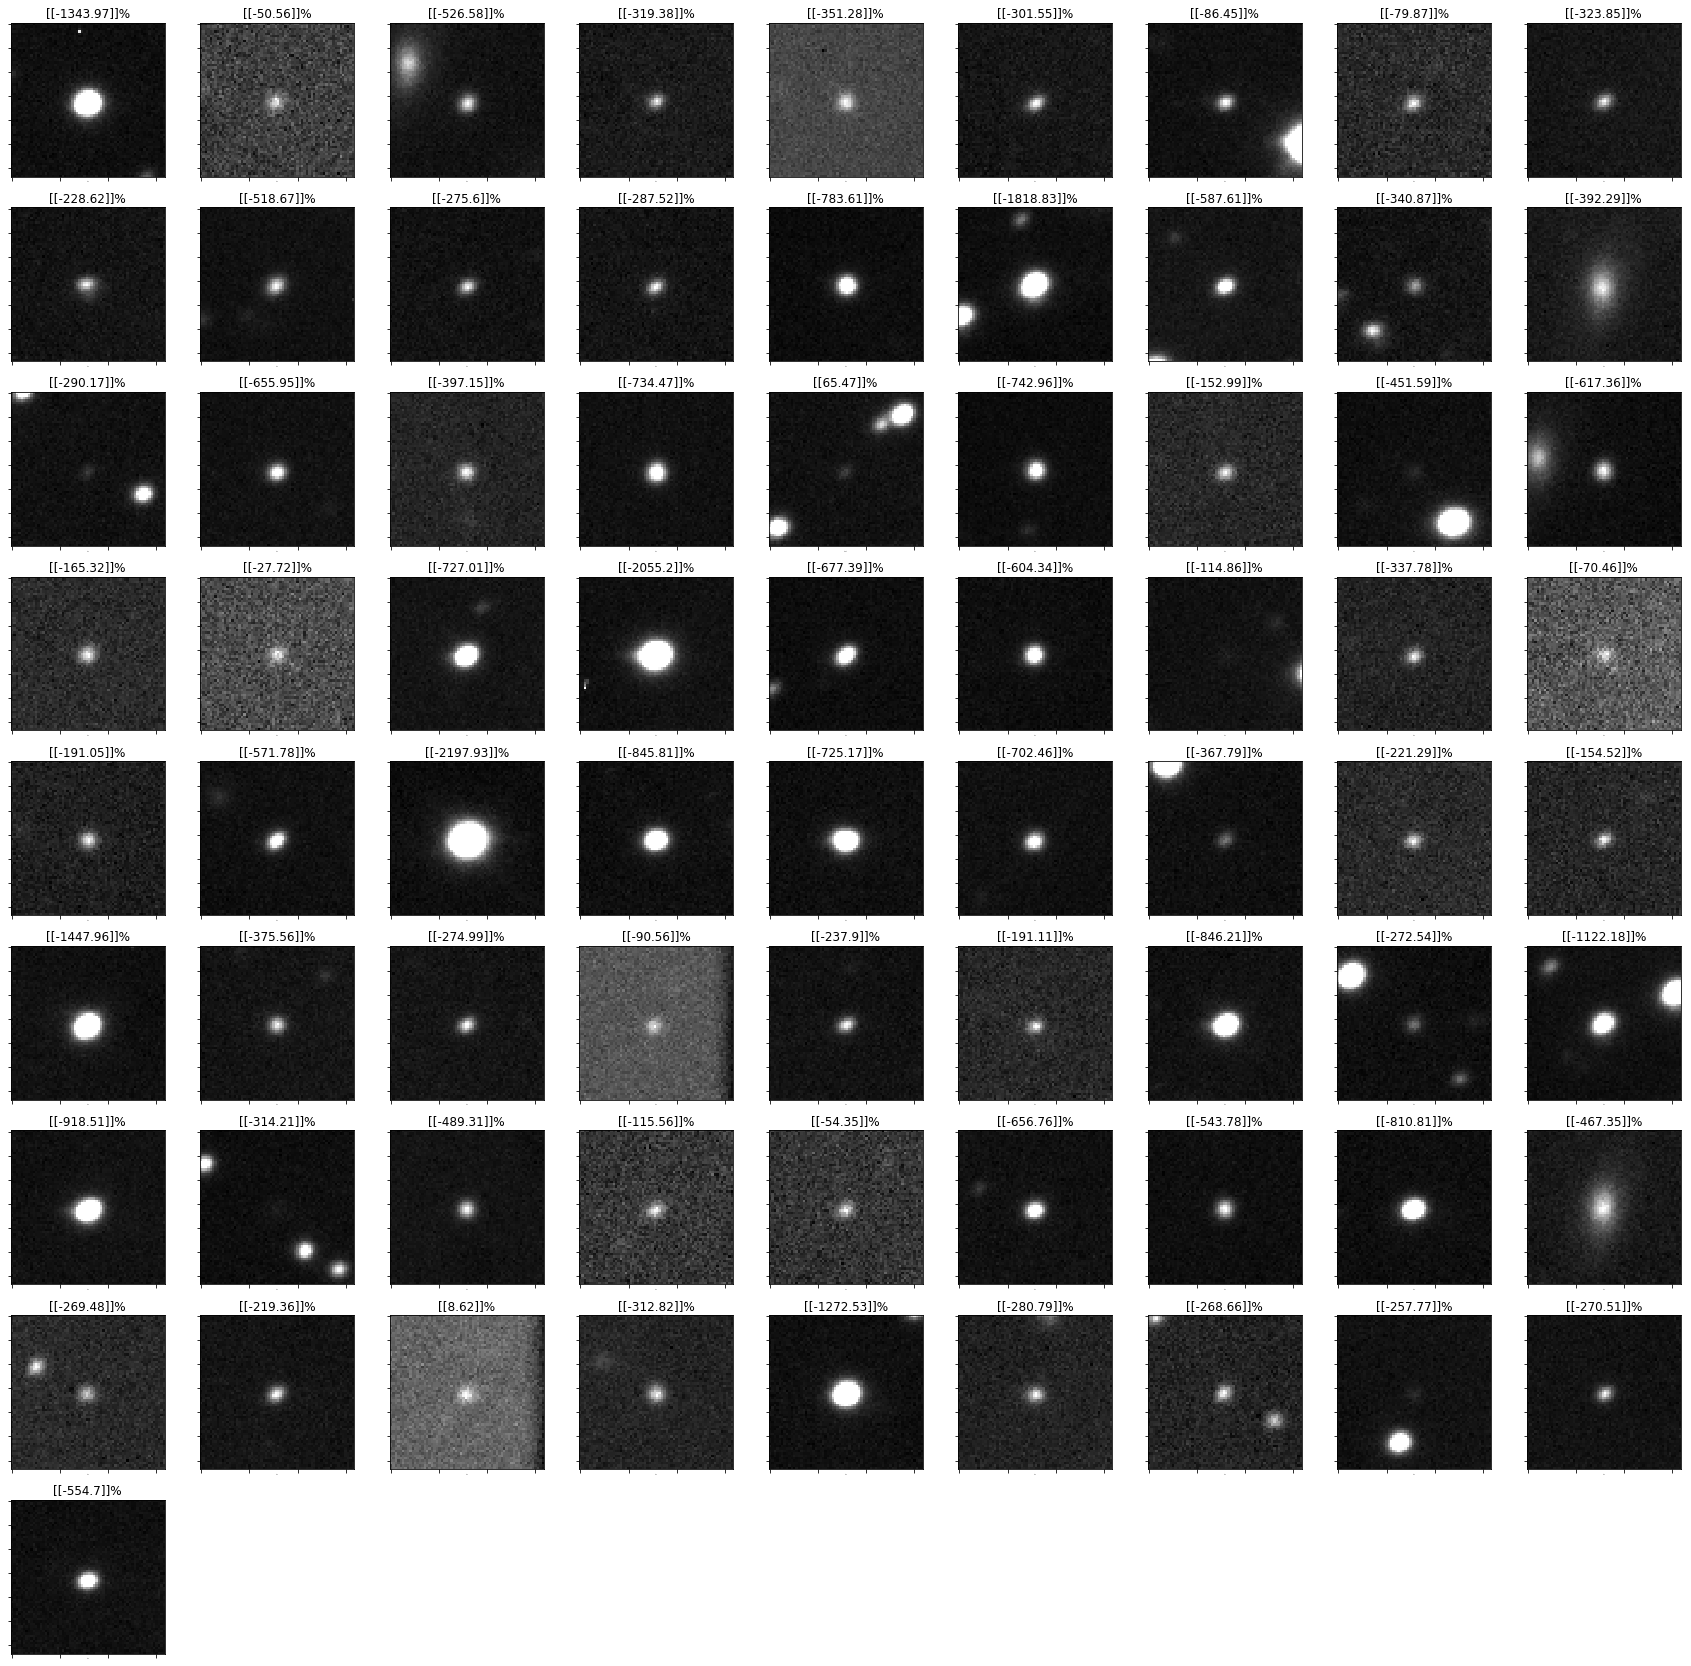

In [49]:
s=0
y_stars=[]
y_artifacts=[]
y_prob=[]
star_prob=[]
arti_prob=[]

plt.figure(figsize=(30,30))
for batch in val_datagen.flow(source,batch_size=1,shuffle=False):
    
    
    pr=model2.predict(batch)
    
    if pr>0.5:
        plt.subplot(9,9,s+1)
        
        temp = np.reshape(batch[0],(64,64))
        plt.imshow(temp,cmap='gray')
        per=str(pr*100)+'%'
        plt.title(per)
        y_stars.append(1)
    
        y_prob.append(pr)

        plt.xlabel('artifact')
        
    else:
        
        plt.subplot(9,9,s+1)
        temp = np.reshape(batch[0],(64,64))
        plt.imshow(temp,cmap='gray')
        per=str(pr*100)+'%'
        plt.title(per)
        plt.xlabel('star')
        y_prob.append(pr)
        y_stars.append(0)
        

    s+=1
    if(s==len(source)):
        break

In [ ]:
names_of_stars[65]

In [ ]:
mag[2]

In [ ]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('robopol_coords.xlsx')
print("Column headings:")
print(df.columns)

robo_x=[]
robo_y=[]

r1mag=[]
r2mag=[]

In [ ]:
for i in df.index:
    robo_x.append(df['# x coord'][i])


In [ ]:
for i in df.index:
    robo_y.append(df[' y coord'][i])
    if i == 0:
        break

In [ ]:
for i in df.index:
    r1mag.append(df['Rmag1'][i])
    if i == 0:
        break

In [ ]:
for i in df.index:
    r2mag.append(df['Rmag2'][i])
    if i == 0:
        break

In [ ]:
actual_coords = []
for somename in names_of_stars:
    
    t=somename.split('RBPLJ1551+5806_01_R_295.00_2014_06_01-22_36_32_')
    k=t[1][:-5]
    
    l=(k.split('_'))
    
    actual_coords.append(l)
    

In [ ]:
actual_coords.append(['511','1281'])

In [ ]:
len(actual_coords)

In [ ]:
sat = cv2.imread('sat.png',0)

In [ ]:
sat = cv2.resize(sat,(64,64))

In [ ]:
sat=sat.reshape(1,64,64,1)

In [ ]:
p_sat = model2.predict(sat)

In [ ]:
art_fac = cv2.imread('artifact_1.png',0)
art_fac = cv2.resize(art_fac,(64,64))
art_fac = art_fac.reshape(1,64,64,1)



In [ ]:
p_art = model2.predict(art_fac)

In [ ]:
p_art

In [ ]:
actual_coords=np.array(actual_coords)
y_prob = np.array(y_prob)
y_prob[3]

In [ ]:
actual_coords[0]

In [ ]:
test_png_img = cv2.imread('testing_1jun14.png',0)
u=0
font = cv2.FONT_HERSHEY_SIMPLEX

for coord in actual_coords:
    x=float(coord[0])
    y=float(coord[1])
    x,y=int(x),int(y)
    
    x1 = x - 10
    x2 = x + 10
    
    y1 = (2048 - y) - 10
    y2 = (2048 - y) + 10
    
    af=round((y_prob[u][0][0]),2)
    
    
    if(float(af)<0.2):    
        cv2.rectangle(test_png_img,(x1,y1),(x2,y2),(220,255,0),3)
        
        cv2.putText(test_png_img,str(af),(x1+4,y1), font, 1,(255,255,255),2,cv2.LINE_AA)
    
    u+=1
    

In [ ]:
plt.figure(figsize=(30,30))
plt.imshow(test_png_img,cmap='gray')

In [ ]:
list_file = open("testing_script/coords_test.txt",'r')


In [ ]:
lines = list_file.readlines()

In [ ]:
x_list=[]
y_list=[]
mag_list=[]
for line in lines:
    block = line.split()
    
    if float(block[2])>-7:
        break
    
    x1 = float(block[0])
    y1 = float(block[1])
    
    x_list.append(block[0])
    y_list.append(block[1])
    mag_list.append(block[2])
    

In [ ]:
png_img = cv2.imread('testing_1jun14.png',0)


im_src=[]

for i in range(len(x_list)):
    
    
    x = int(float(x_list[0]))
    y = int(float(y_list[0]))

    if x>64 and x < 1990 and y>64 and y<1990:
        
        crop_img = png_img[(2048-y)-32:(2048-y)+32, x-32:x+32]
        
        im_src.append(cv2.resize(crop_img, (64,64), interpolation=cv2.INTER_CUBIC))
        
        

In [ ]:
im_src=np.array(im_src)

In [ ]:
im_src=im_src.reshape(501,64,64,1)

prob_im_src=[]
res_im_src=[]

In [ ]:

i=0
for img in im_src:
    
    img = img.reshape(1,64,64,1)
    
    pr=model2.predict(img)
    
    prob_im_src.append(pr)
    
    i+=1
    
    print(pr)
    if pr>0.5:
        
        res_im_src.append(1)
        
    else:
        res_im_src.append(0)
        
    if(i==len(im_src)):
        break


In [ ]:
plt.imshow(im_src[0,:,:,0])

In [ ]:
import numpy as np
import numpy.ma as ma
import os
import astropy.units as u
from astropy.io import fits

from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.stats import sigma_clipped_stats, sigma_clip
import subprocess

In [ ]:
fits_img = 'magnitude_mapping/wcs/13_RBPLJ1551+5806_01_R_295.00_2014_06_01-22_36_32.fits'

In [ ]:
wcs_file = 'magnitude_mapping/wcs/13_RBPLJ1551+5806_01_R_295.00_2014_06_01-22_36_3.wcs'

In [ ]:
f = fits.open(fits_img)
data = f[0].data  #This is the image array
header = f[0].header


In [ ]:
f[0].header = wcs_file